### Libraries

In [13]:
%%capture
%reset -f                        # clear all variables from the workspace
'generic imports'
import os
import pandas as pd
import sys
import numpy as np
sys.path.append(os.path.abspath('..'))
from src import utils   
import datetime  
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load EdgeIIot_train dataset

In [14]:
df = pd.read_csv('../data/EdgeIIot_train_100k.csv', low_memory=False)
# shuffle the data
df_original = df.sample(frac=1).reset_index(drop=True)

### Features name and type

In [3]:
# list all the features of df_original
features = df_original.columns
features = pd.DataFrame(features)

# retrieve the categorical features from df_original
categorical_features = df_original.select_dtypes(include=['object']).columns
# retrieve the remaining features from df_original
numerical_features = df_original.select_dtypes(exclude=['object']).columns

In [31]:
num_unique_values = 4
features_less = []
for i in range(len(features)):
        if len(df_original[features[0][i]].unique()) < num_unique_values:
            features_less.append(features[0][i])
features_less

['arp.opcode',
 'arp.hw.size',
 'icmp.unused',
 'http.response',
 'http.tls_port',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags.ack',
 'dns.qry.type',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.msg_decoded_as',
 'mqtt.proto_len',
 'mqtt.protoname',
 'mqtt.topic',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.unit_id',
 'Attack_label']

In [27]:
len(features)

48

In [26]:
# from df_original, show columns 'orp.ocode'
df_original[features[0][0]].unique()

array([0., 2., 1.])

In [25]:
features[0][0]

'arp.opcode'

#### Categorical Features

In [4]:
# print categorical features in 2 columns
categorical_features = categorical_features.values.tolist()
categorical_features = np.array_split(categorical_features, 2)
categorical_features = pd.DataFrame(categorical_features).transpose()
categorical_features.columns = ['Categorical Features 1', 'Categorical Features 2']
categorical_features

Categorical Features 1 Categorical Features 2
0    http.request.method      mqtt.conack.flags
1           http.referer         mqtt.protoname
2   http.request.version             mqtt.topic
3       dns.qry.name.len            Attack_type

#### Numerical Features

In [5]:
# print numerical features in 2 columns
numerical_features = numerical_features.values.tolist()
numerical_features_dtype = df_original[numerical_features].dtypes
# concatenate the numerical features and their data types
numerical_features = np.concatenate((np.array(numerical_features).reshape(-1,1), np.array(numerical_features_dtype).reshape(-1,1)), axis=1)
numerical_features = pd.DataFrame(numerical_features)

numerical_features.columns = ['Numerical Features', 'Data Type']
numerical_features

Numerical Features Data Type
0                  arp.opcode   float64
1                 arp.hw.size   float64
2               icmp.checksum   float64
3                 icmp.seq_le   float64
4                 icmp.unused   float64
5         http.content_length   float64
6               http.response   float64
7               http.tls_port   float64
8                     tcp.ack   float64
9                 tcp.ack_raw   float64
10               tcp.checksum   float64
11         tcp.connection.fin   float64
12         tcp.connection.rst   float64
13         tcp.connection.syn   float64
14      tcp.connection.synack   float64
15                  tcp.flags   float64
16              tcp.flags.ack   float64
17                    tcp.len   float64
18                    tcp.seq   float64
19                 udp.stream   float64
20             udp.time_delta   float64
21               dns.qry.name   float64
22                 dns.qry.qu   float64
23               dns.qry.type   float64
24         dns.retransmission   float64
25     dns.retransmit_request   float64
26  dns.retransmit_request_in   float64
27     mqtt.conflag.cleansess   float64
28              mqtt.conflags   float64
29              mqtt.hdrflags   float64
30                   mqtt.len   float64
31        mqtt.msg_decoded_as   float64
32               mqtt.msgtype   float64
33             mqtt.proto_len   float64
34             mqtt.topic_len   float64
35                   mqtt.ver   float64
36                  mbtcp.len   float64
37             mbtcp.trans_id   float64
38              mbtcp.unit_id   float64
39               Attack_label     int64

### Graphical analysis

#### Numerical Features scatter plots

In [239]:
def plot_attack_types(df, column_name, normal_marker_size=100, alpha=0.7):
    plt.figure(figsize=(12, 5))
    plt.title(column_name)

    # Convert the Attack_type column to numerical values
    attack_type_codes, _ = pd.factorize(df['Attack_type'])

    # Different markers and colors for each Attack_type
    markers = ['o', 's', '*', 'D', 'v', '^', '<', '>', 'p', 'P', 'h', 'H', '+', 'x', '|']
    colors = plt.cm.get_cmap('tab20', len(markers))  # Use a colormap for variety of colors

    # Scatter plot with varying markers and colors for each Attack_type
    for i, attack_type in enumerate(df['Attack_type'].unique()):
        marker = markers[i % len(markers)]  # Vary the marker for each Attack_type
        size = normal_marker_size if attack_type == 'Normal' else 10  # Larger marker size for 'Normal' attack type
        color = colors(i)  # Use colormap to vary the color

        plt.scatter(df.index[df['Attack_type'] == attack_type],
                    df.loc[df['Attack_type'] == attack_type, column_name],
                    label=attack_type, marker=marker, s=size, alpha=alpha, c=color)

    # Highlight the majority region for 'Normal' attack type
    normal_points = df[df['Attack_type'] == 'Normal'][column_name]
    normal_mean = normal_points.mean()
    normal_std = normal_points.std()
    threshold = normal_mean + 1.5 * normal_std
    plt.axhline(y=threshold, color='r', linestyle='--', label='Normal Majority Region')

    # Set labels and legend
    plt.xlabel('Index')
    plt.ylabel(column_name)
    plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.show()


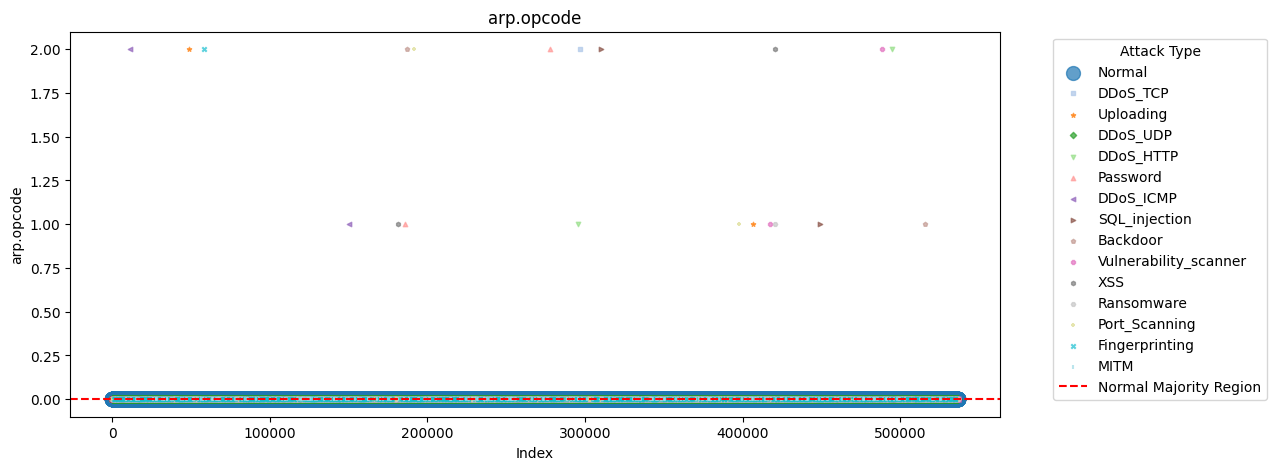

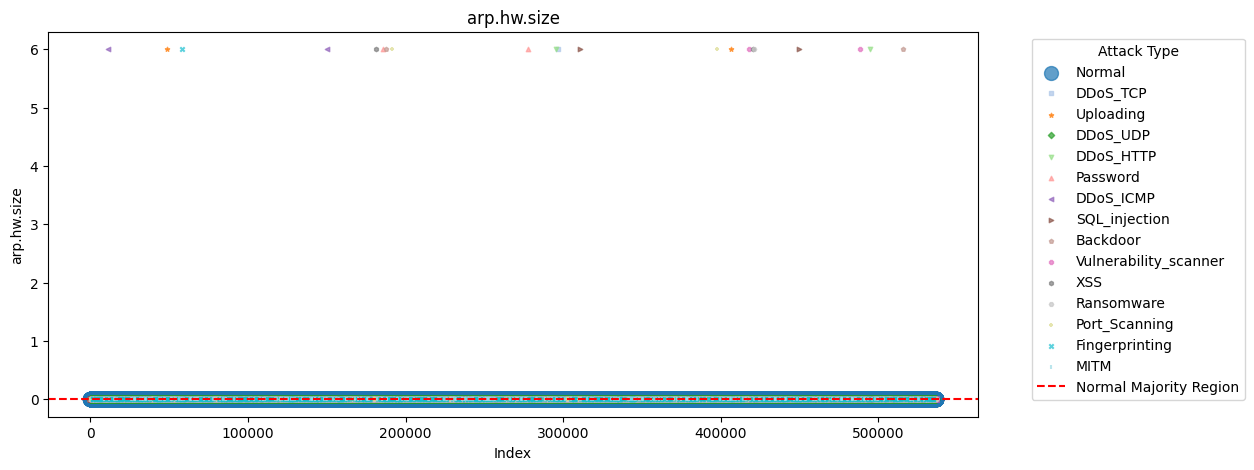

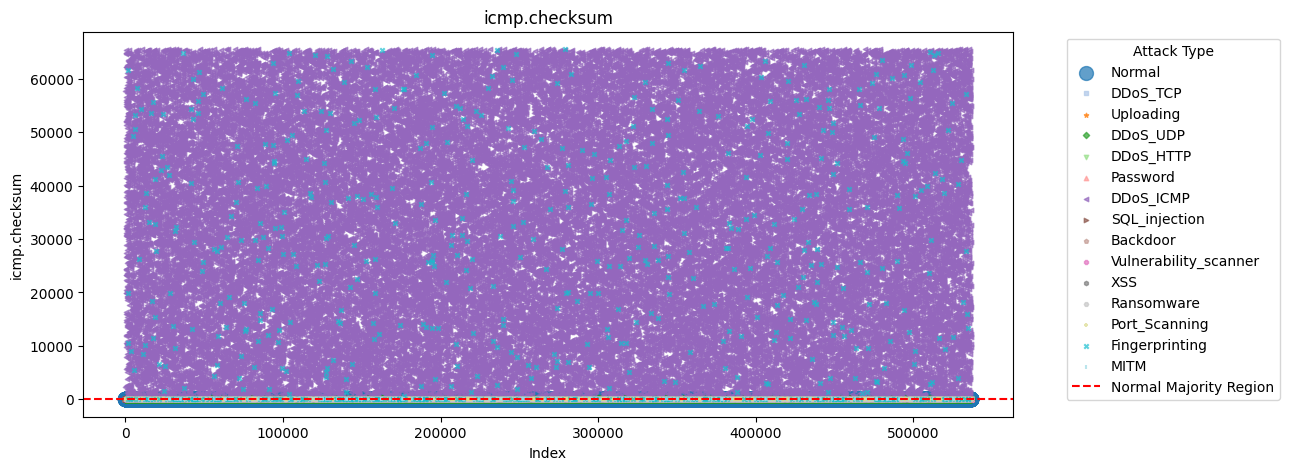

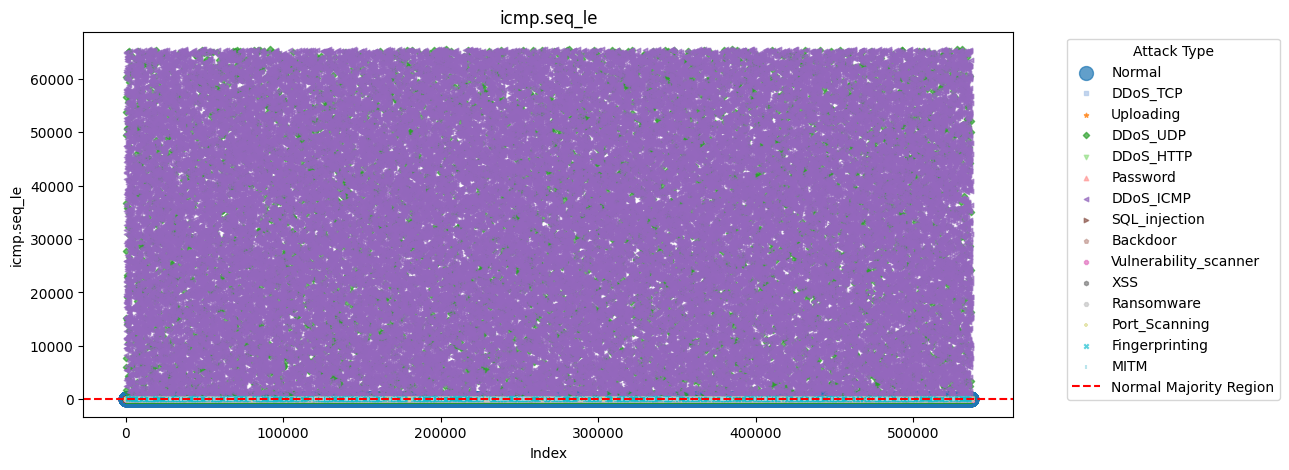

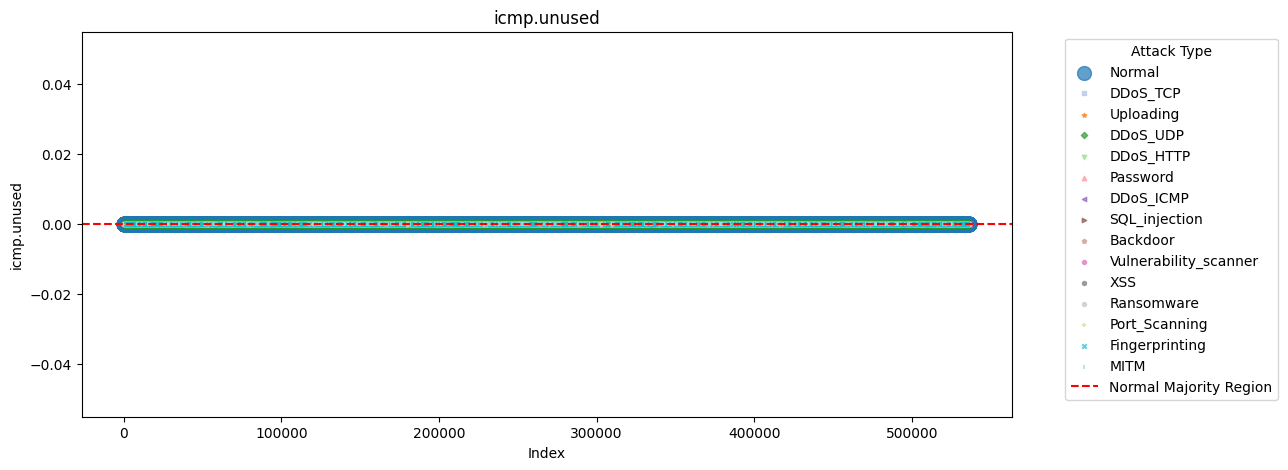

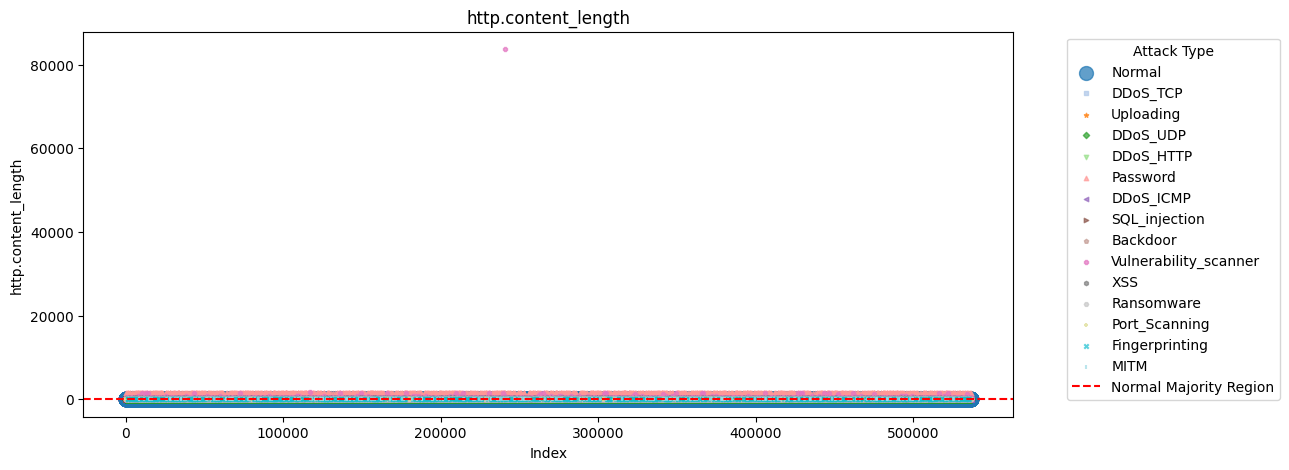

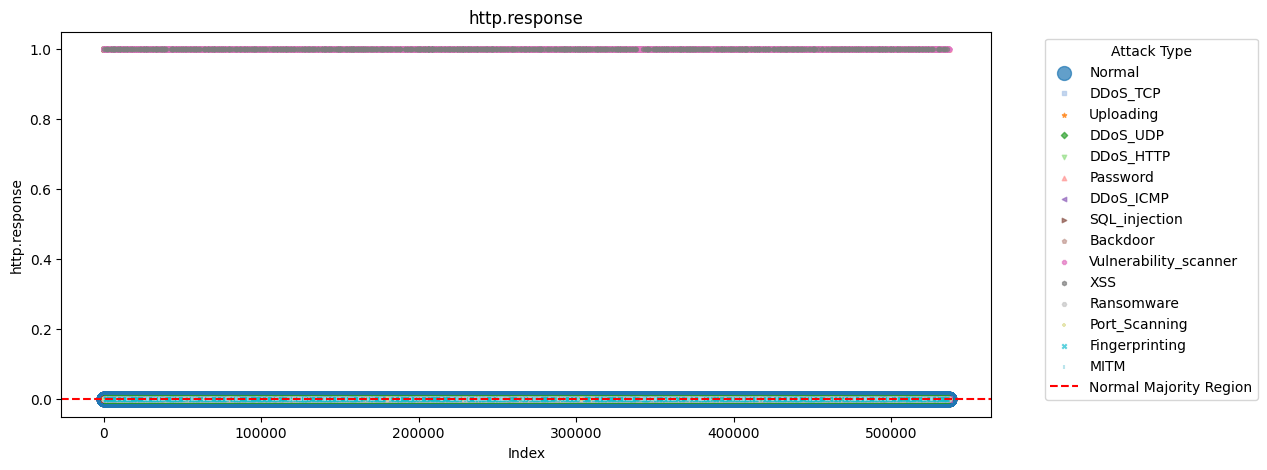

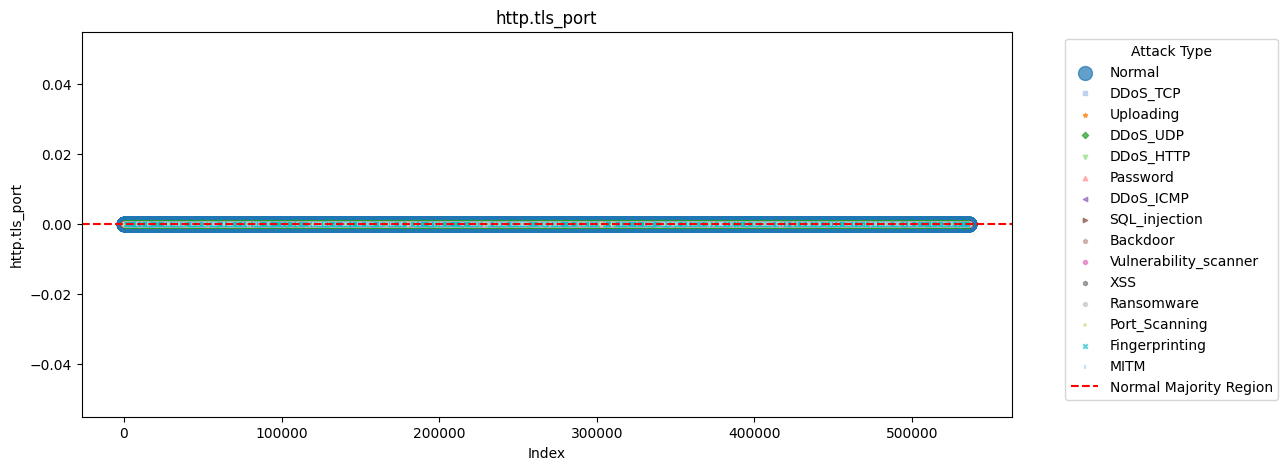

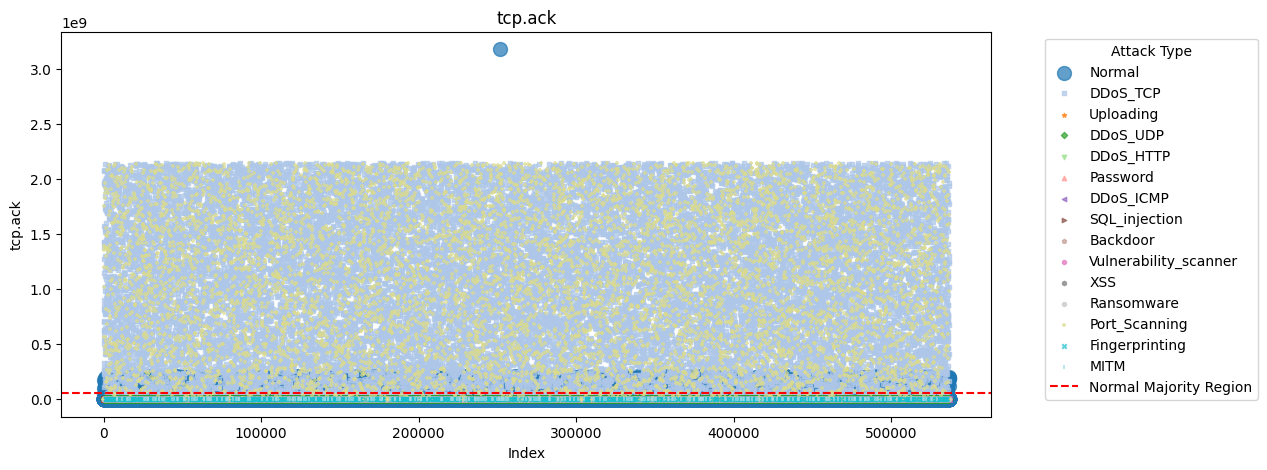

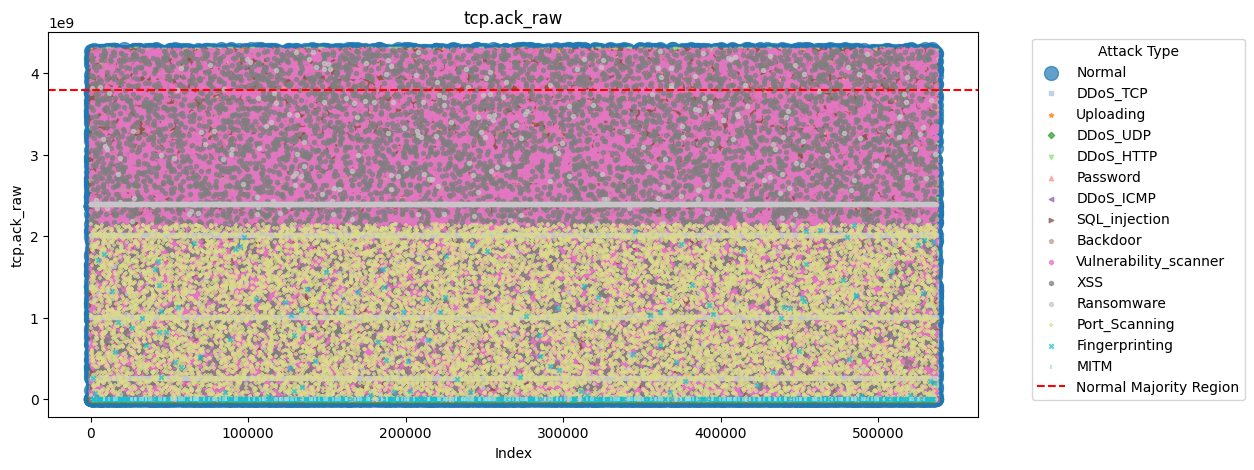

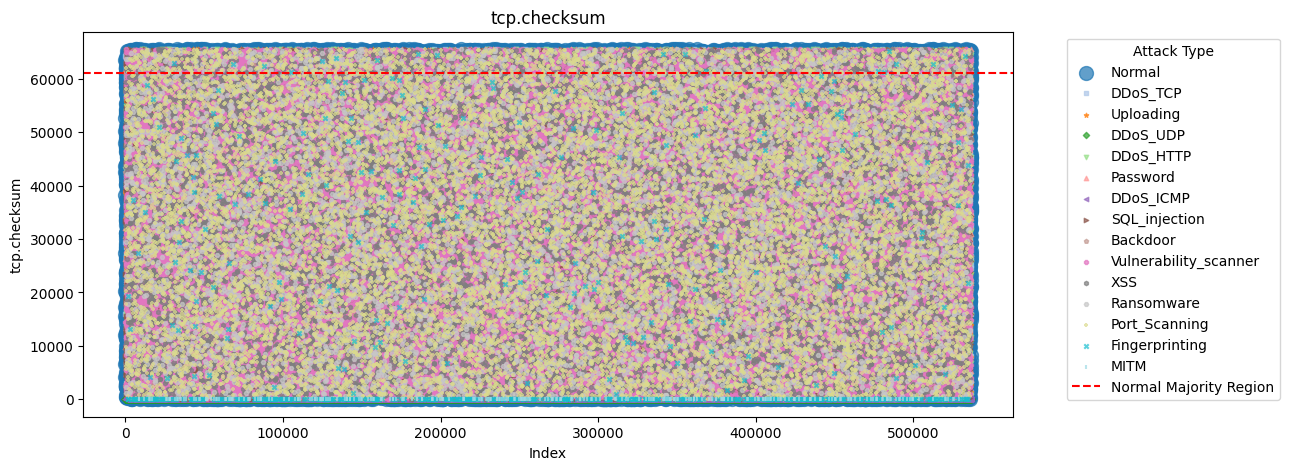

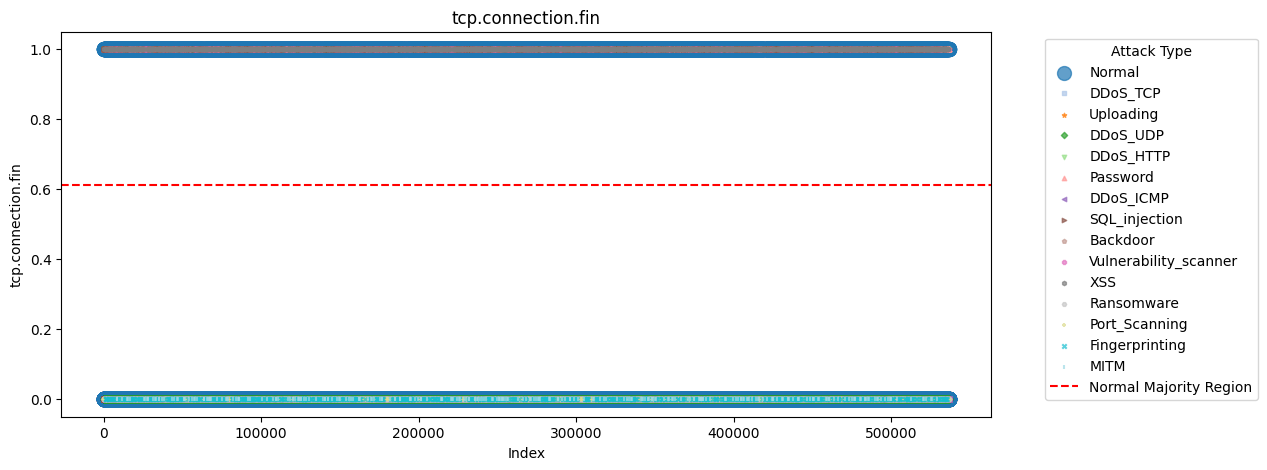

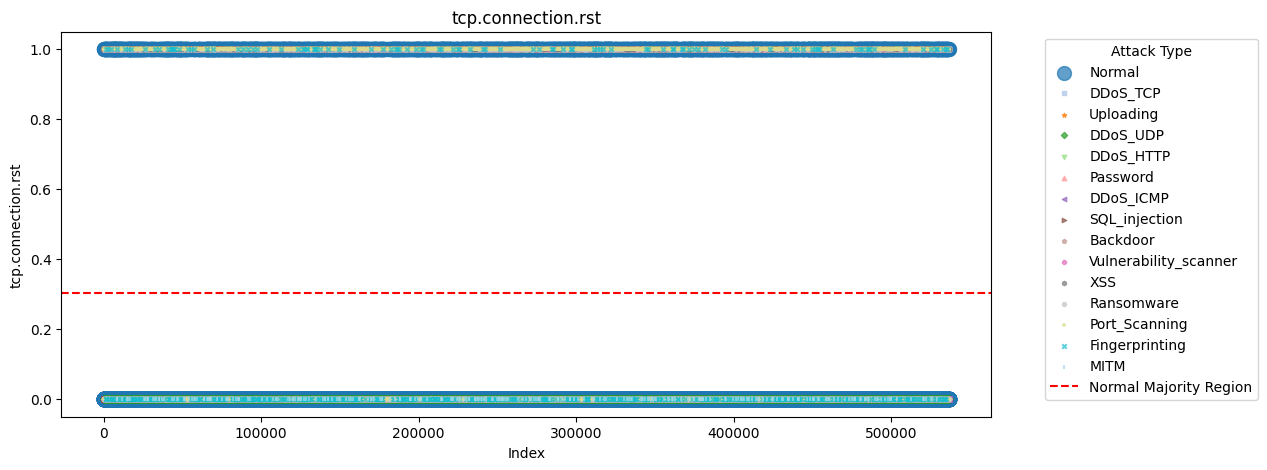

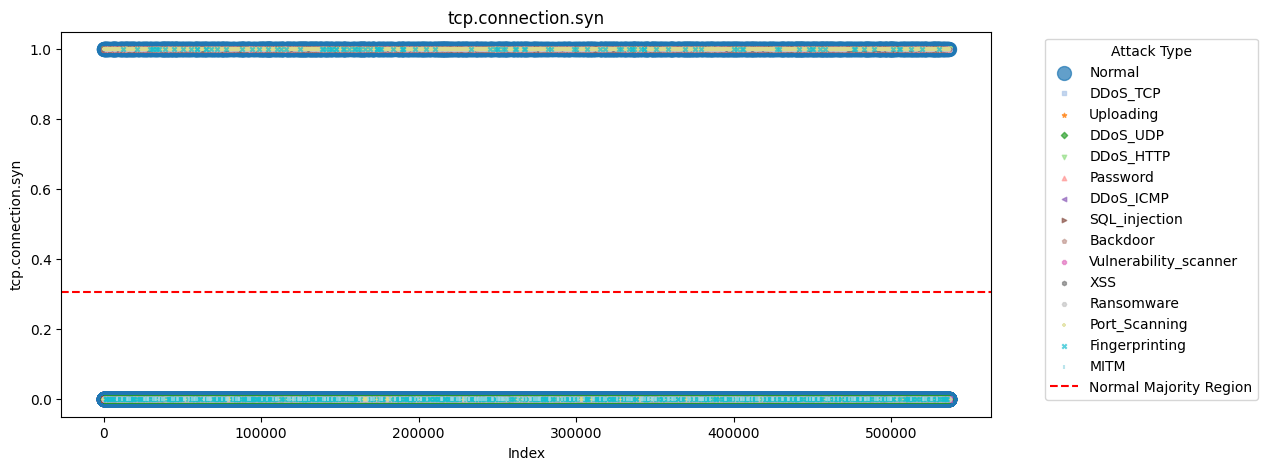

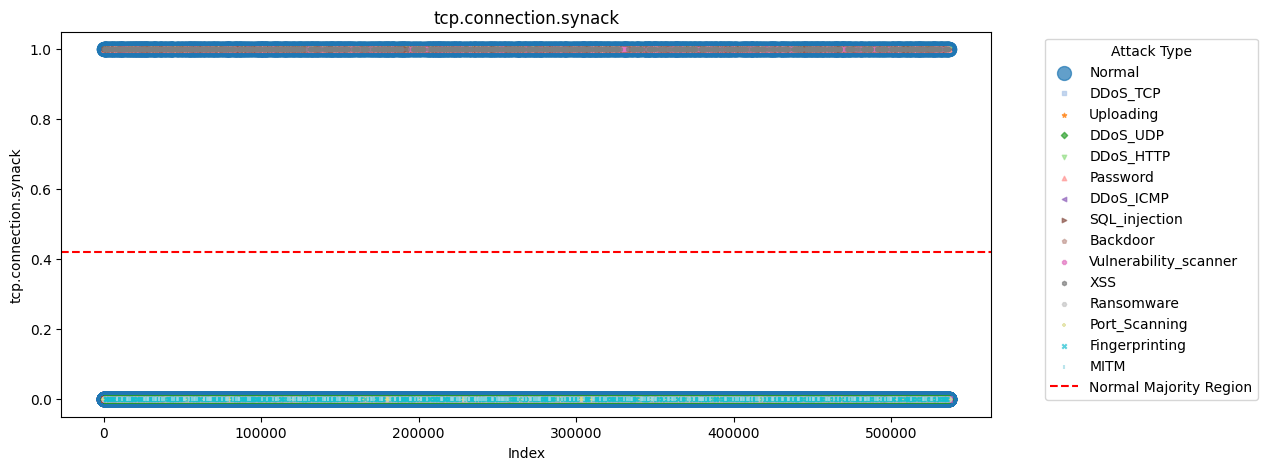

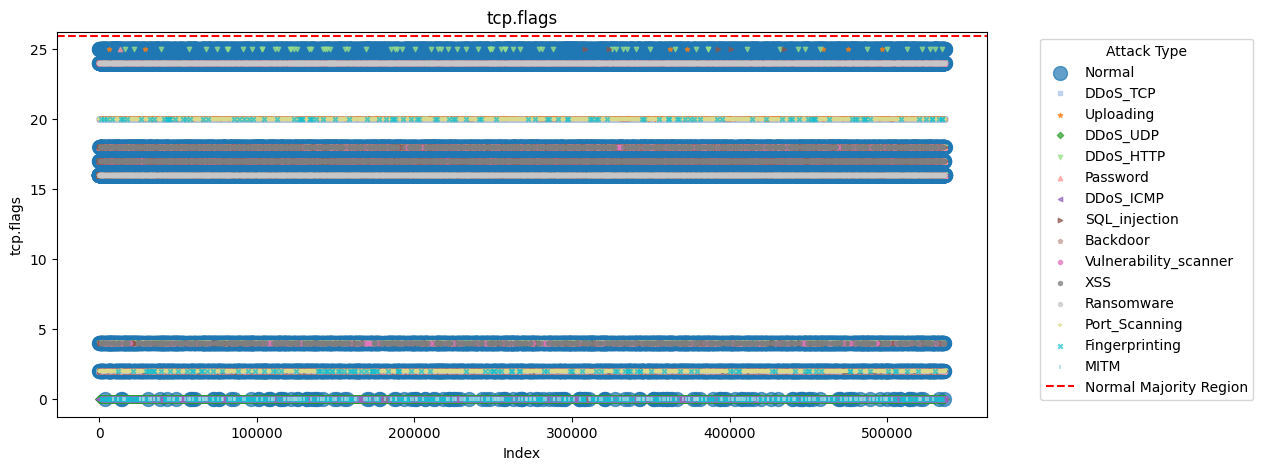

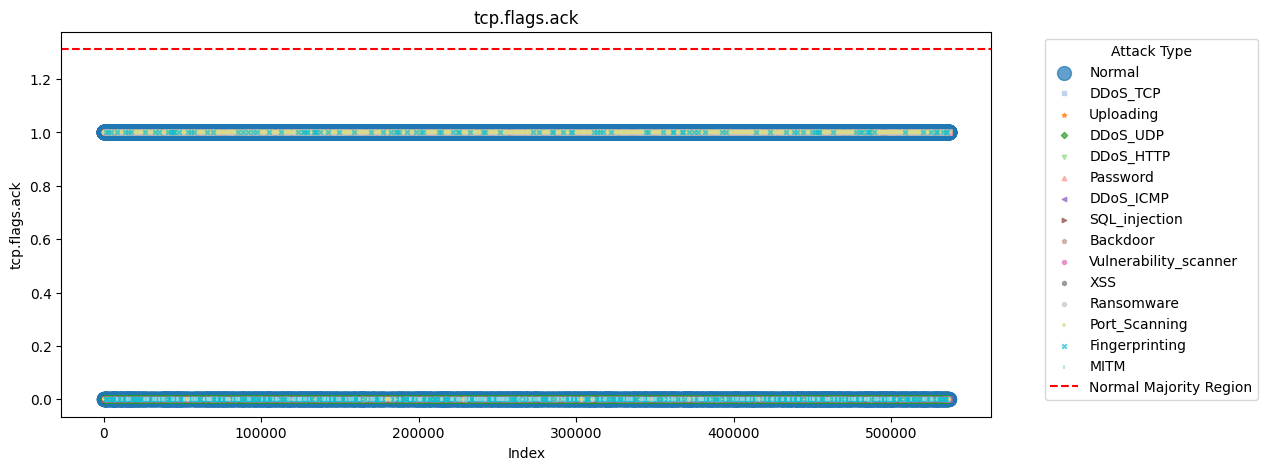

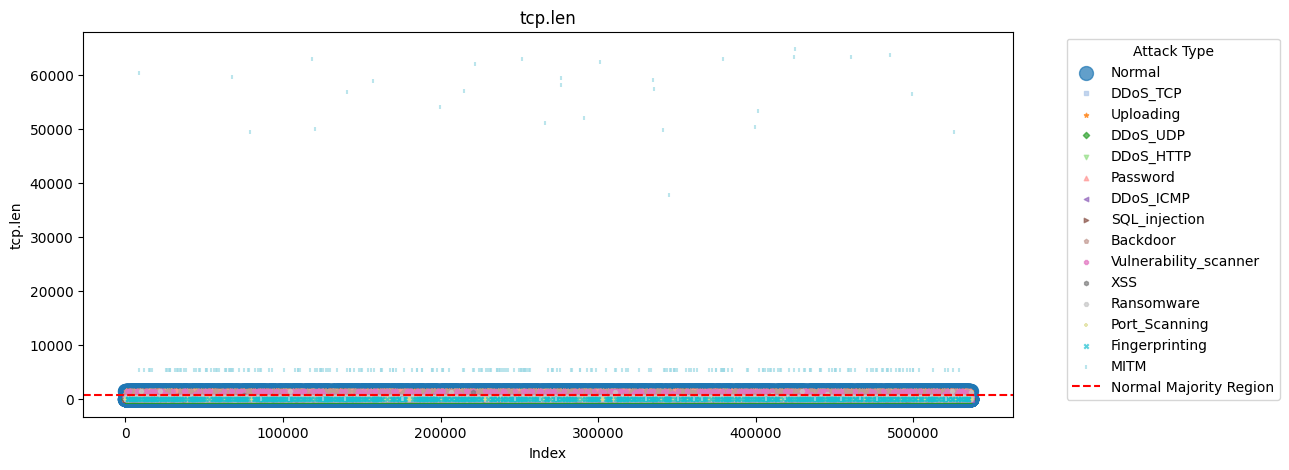

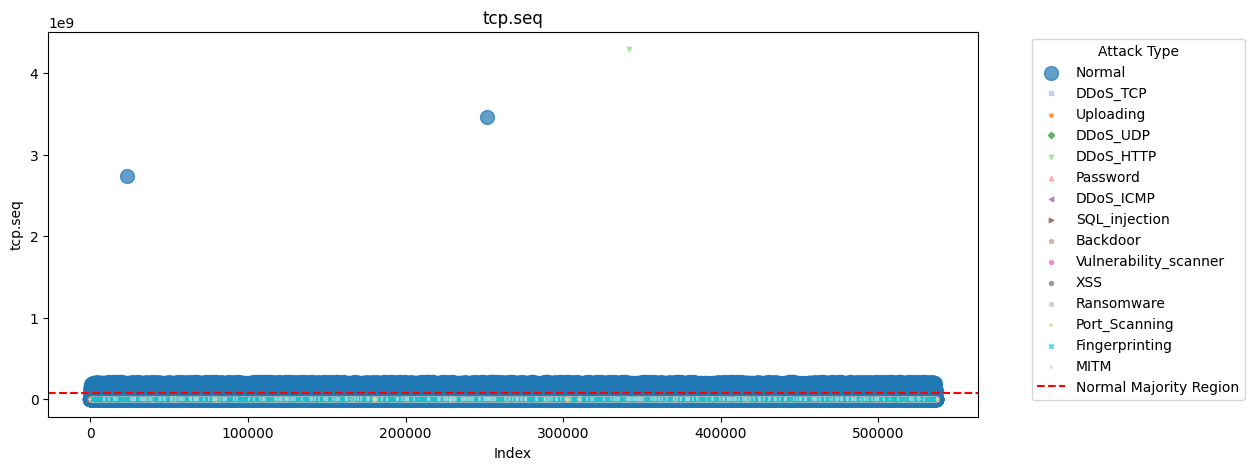

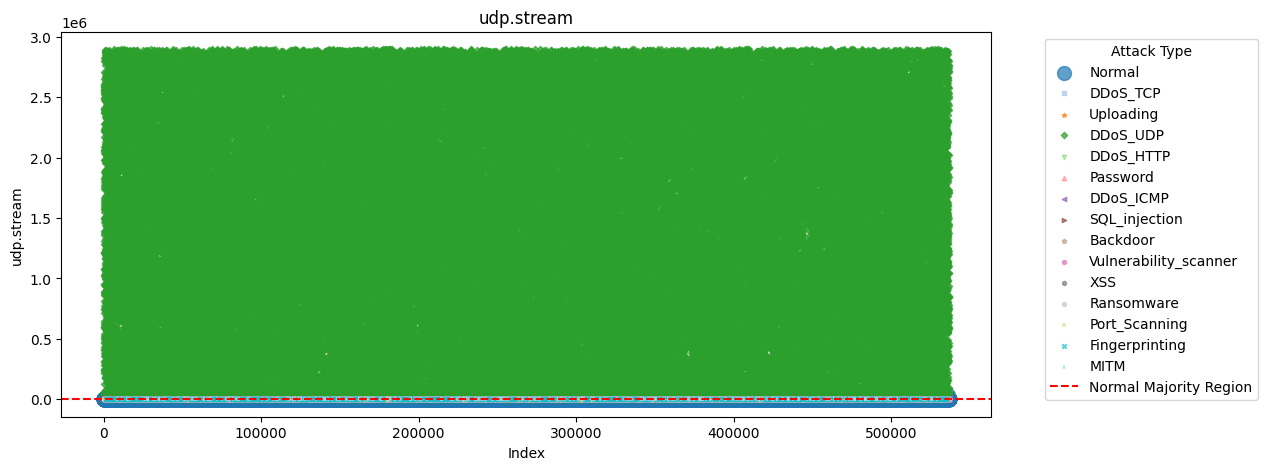

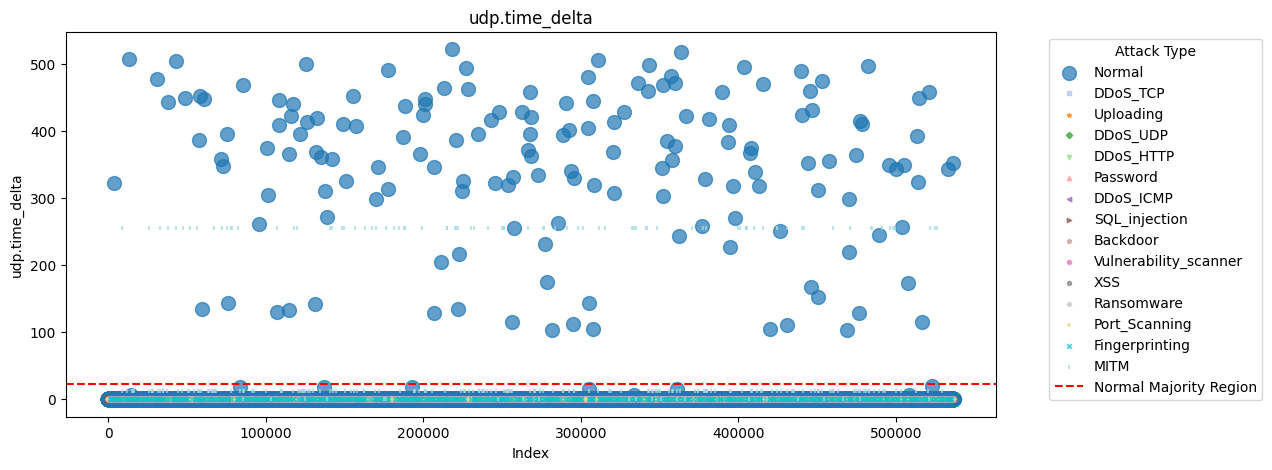

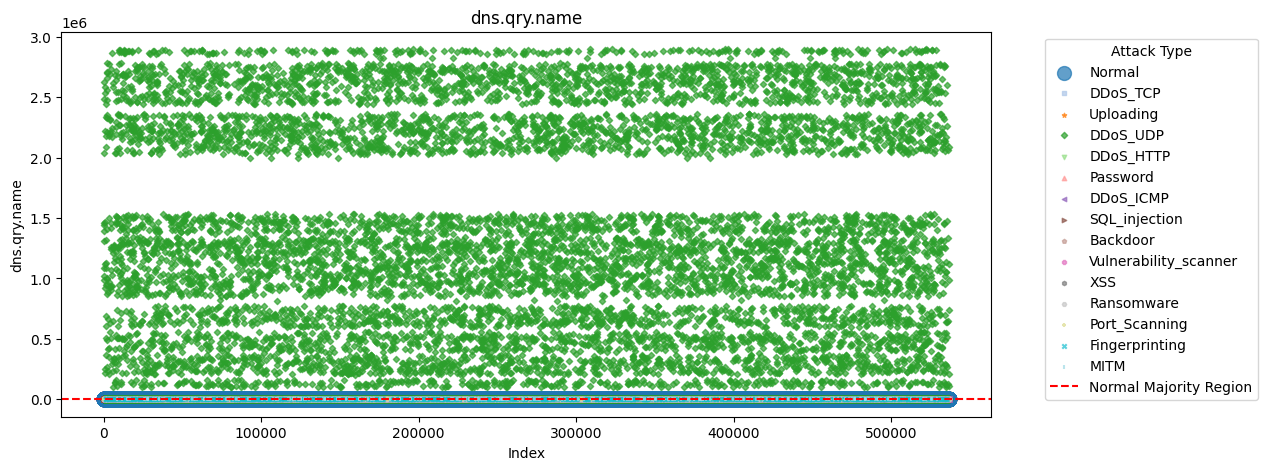

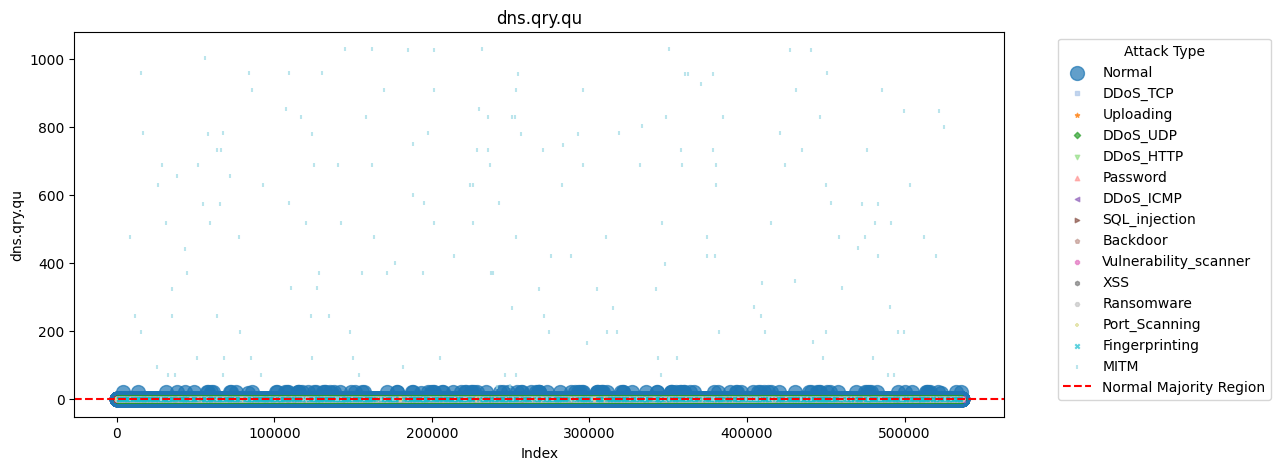

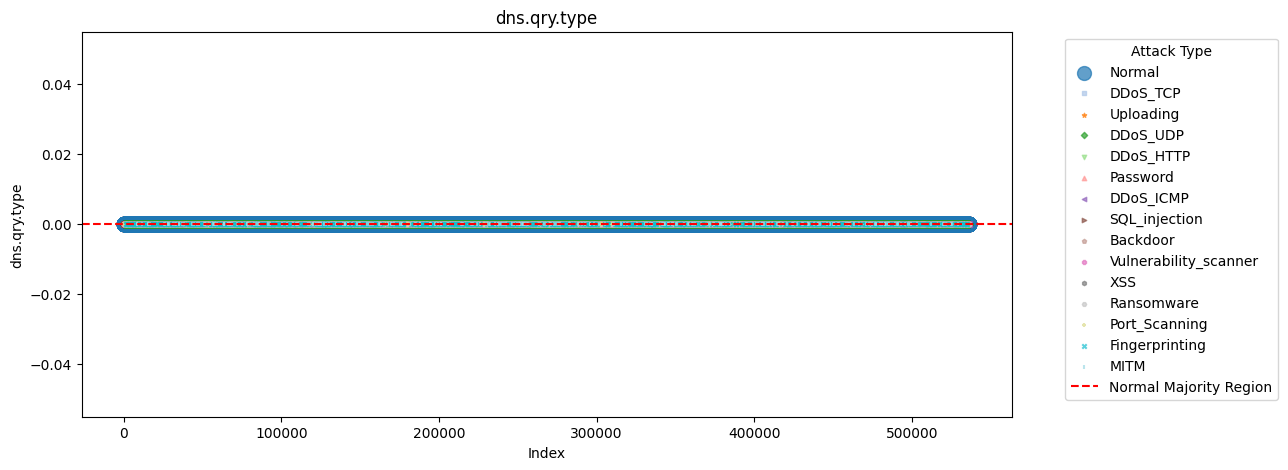

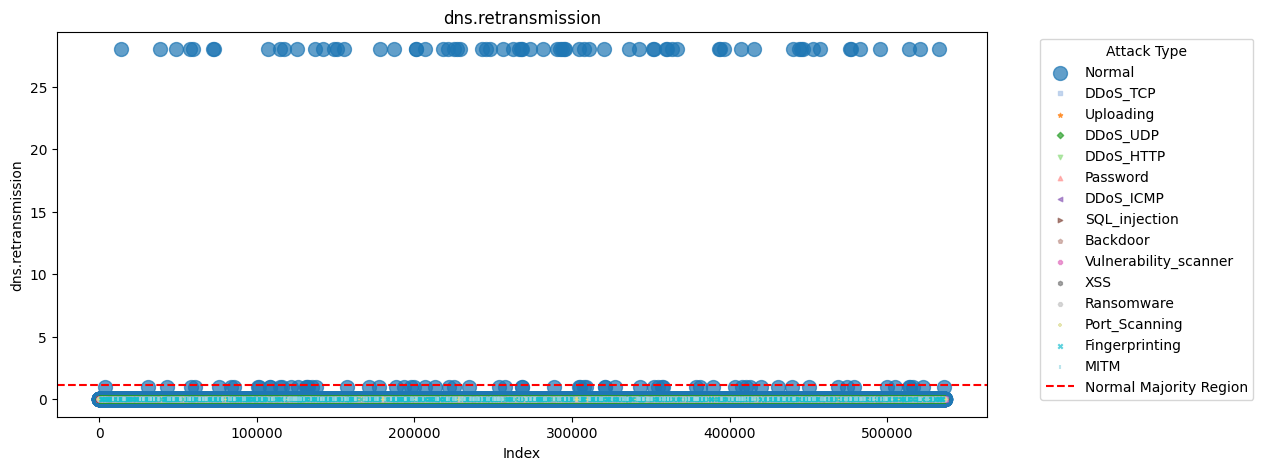

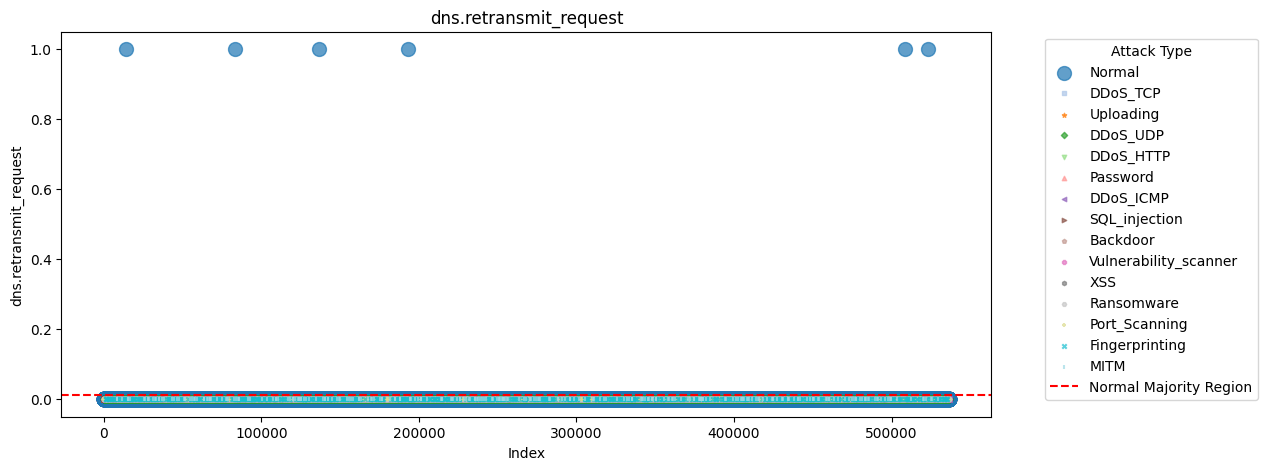

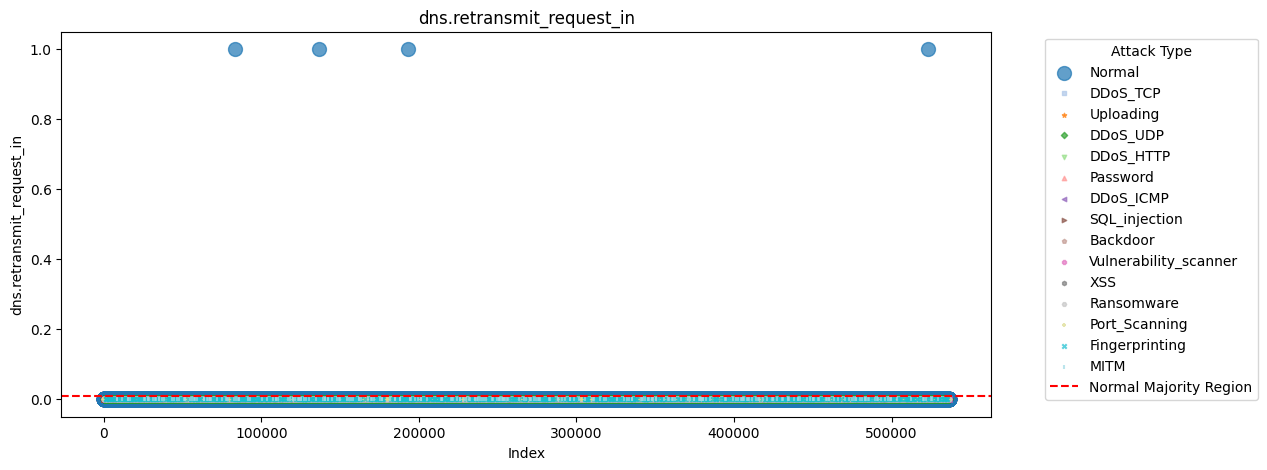

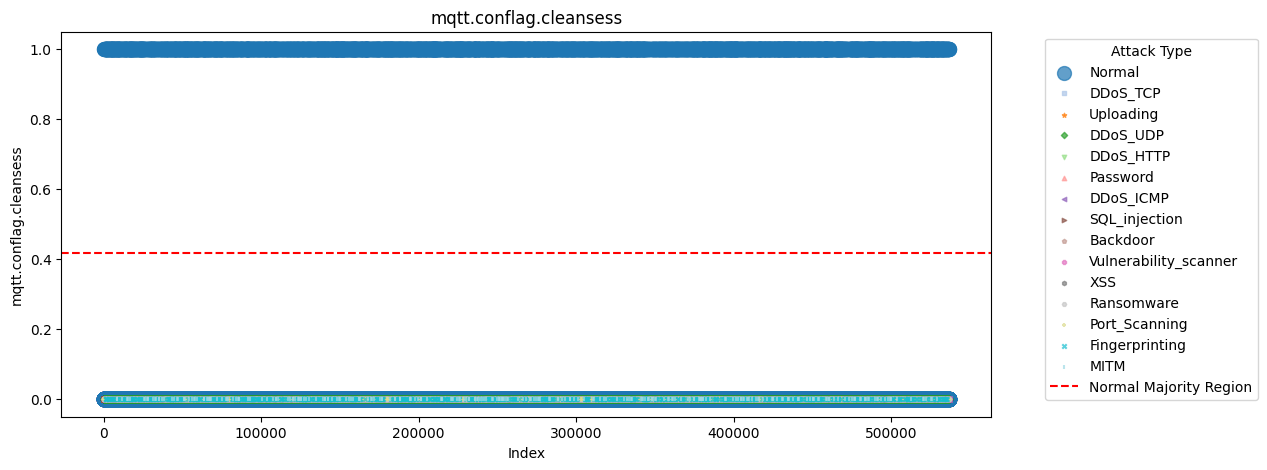

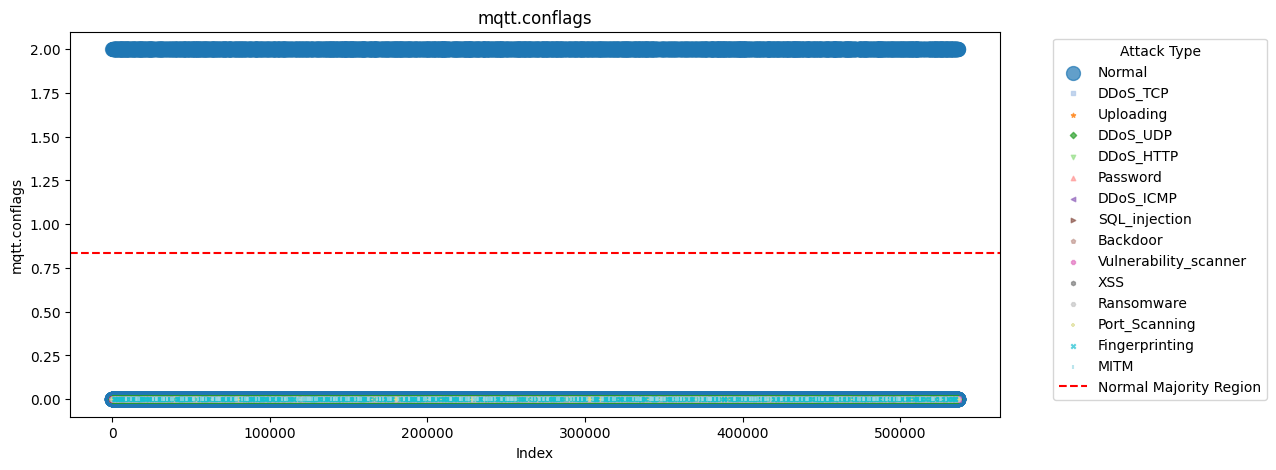

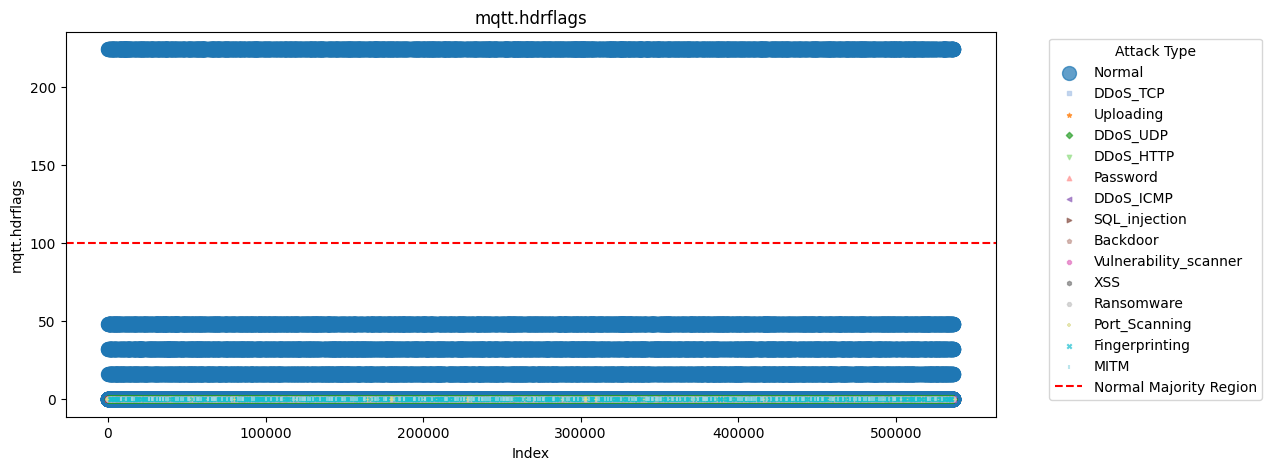

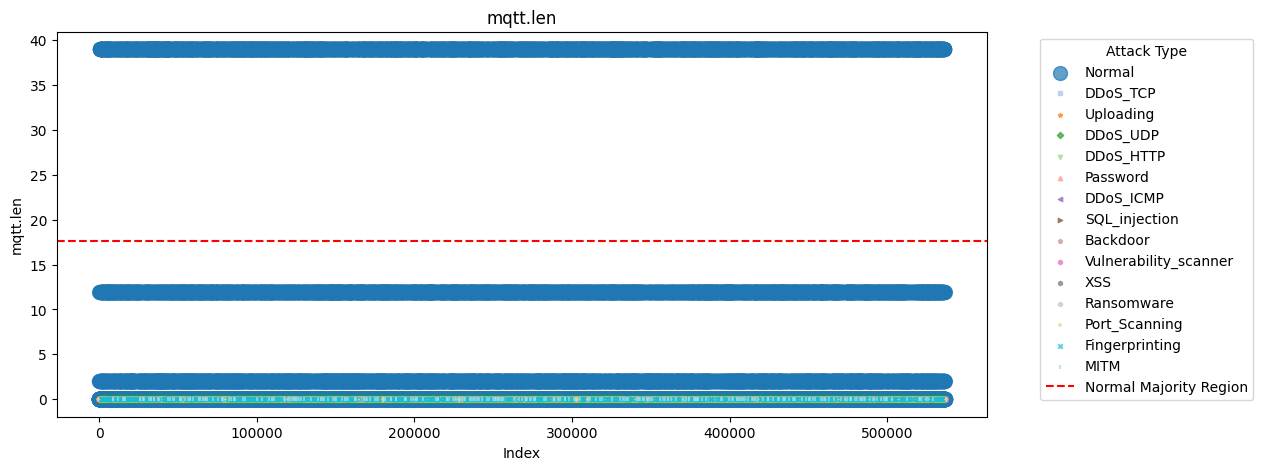

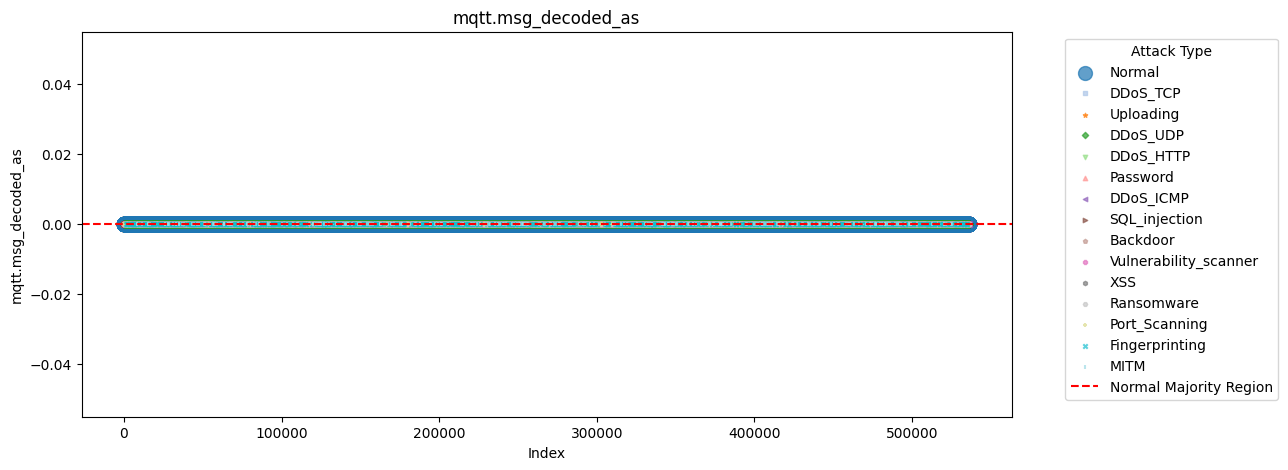

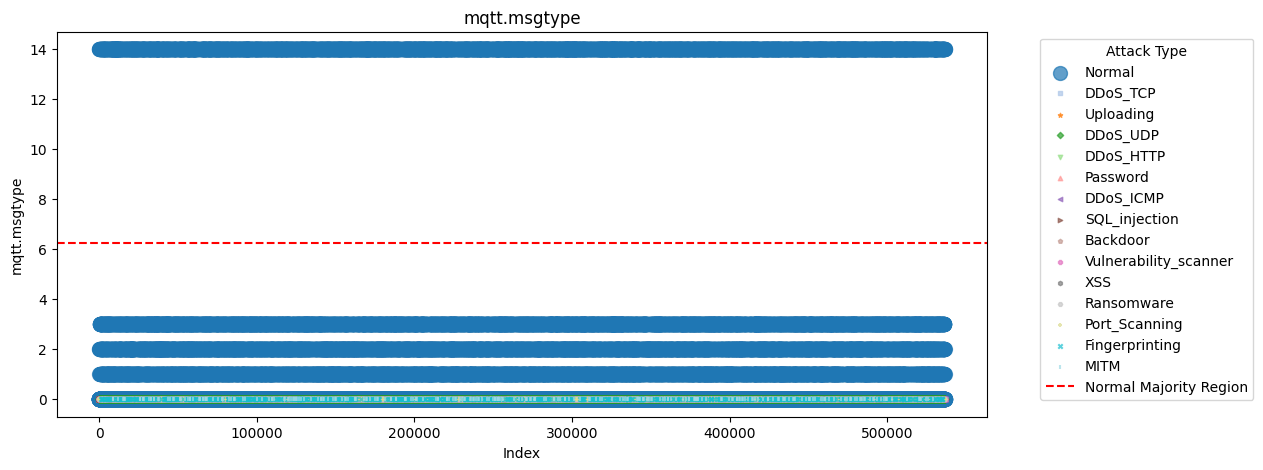

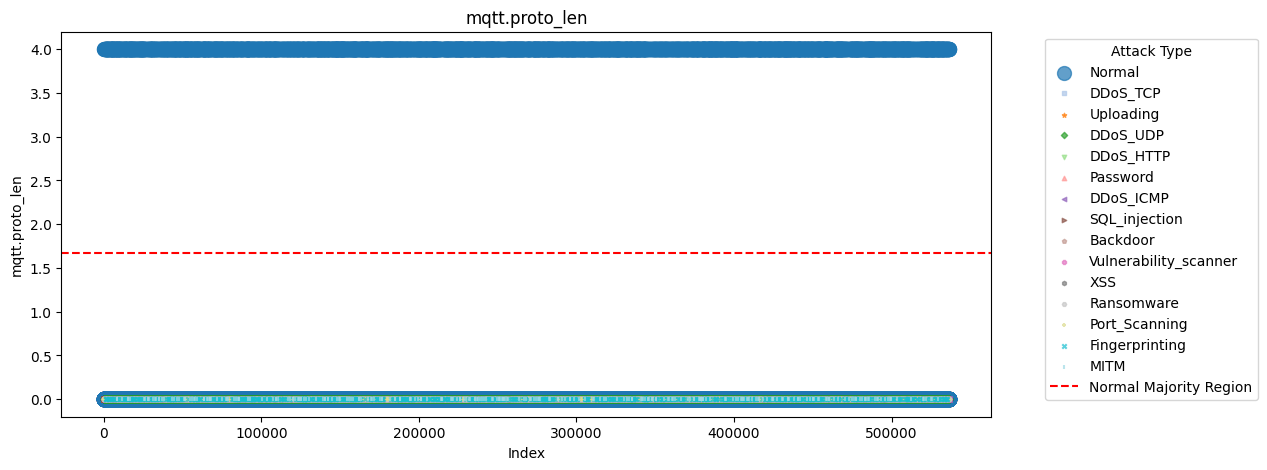

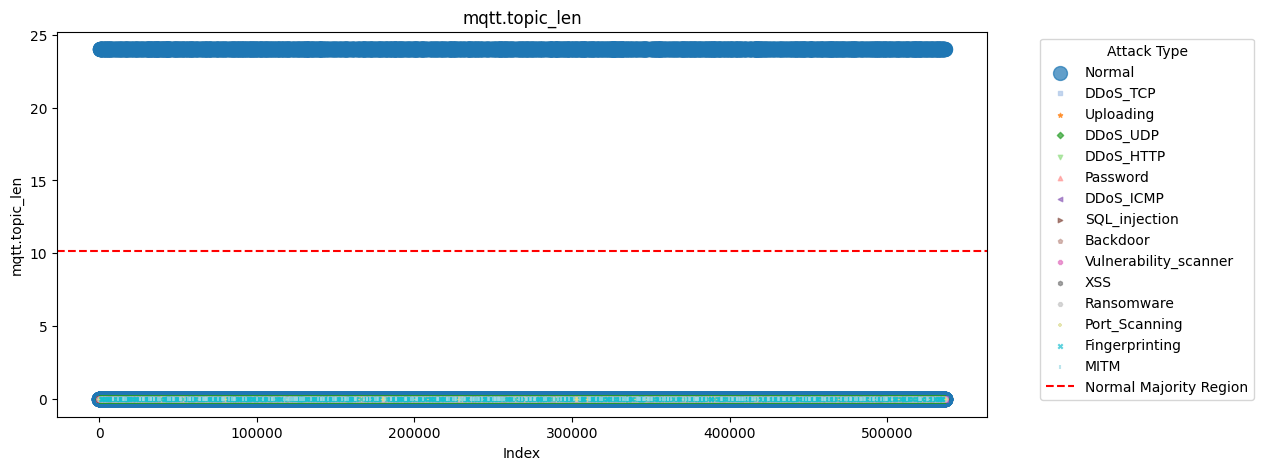

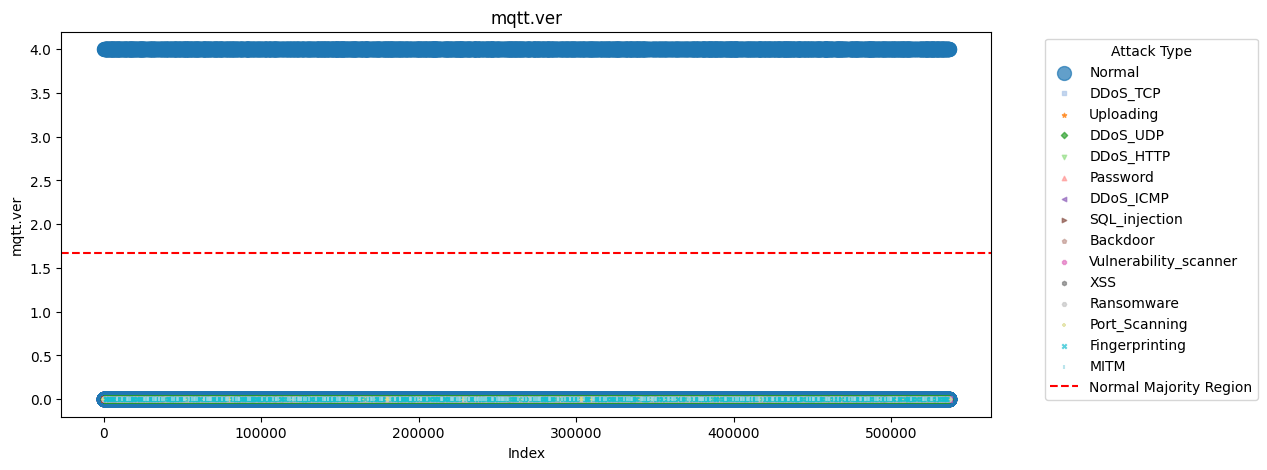

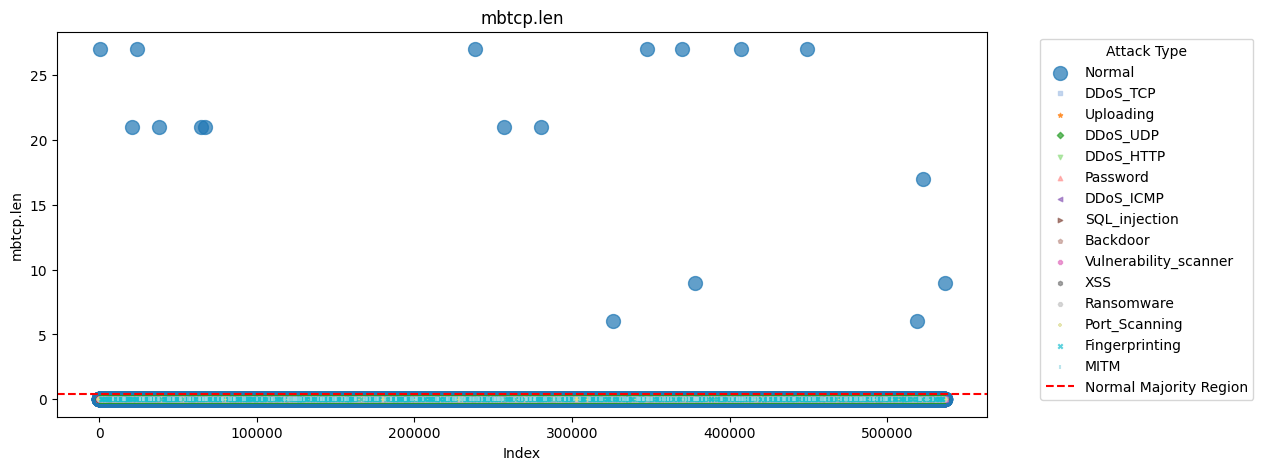

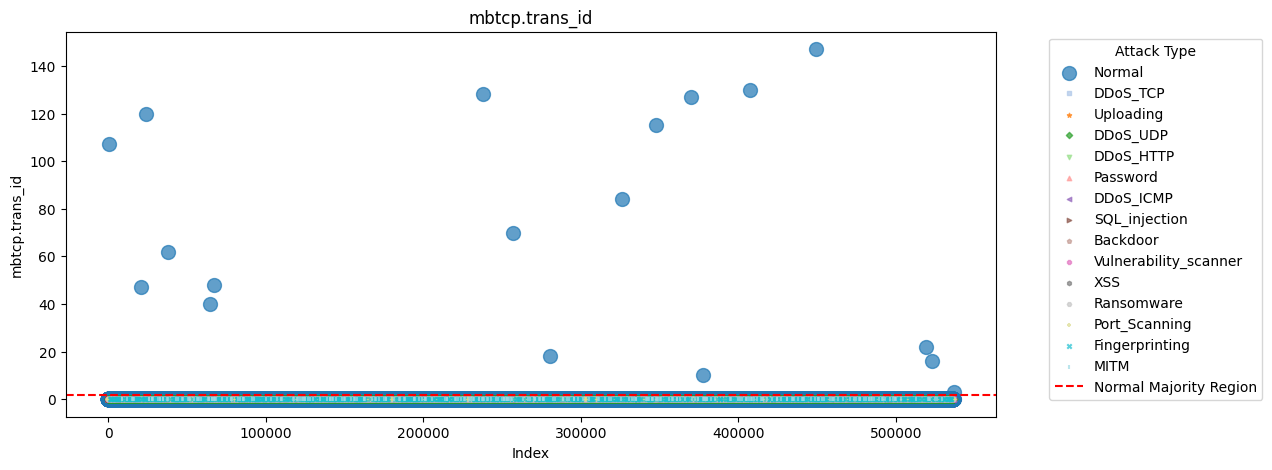

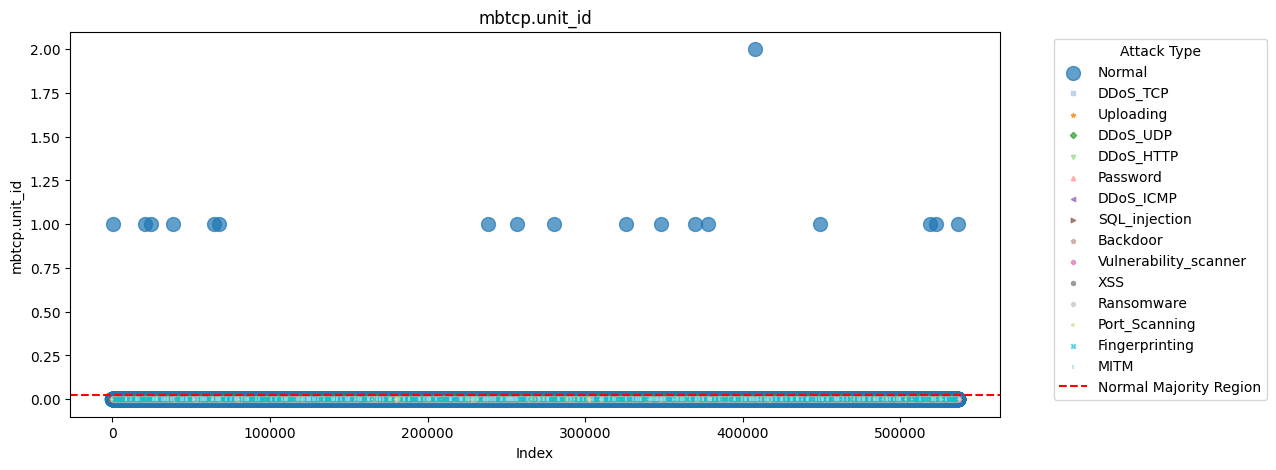

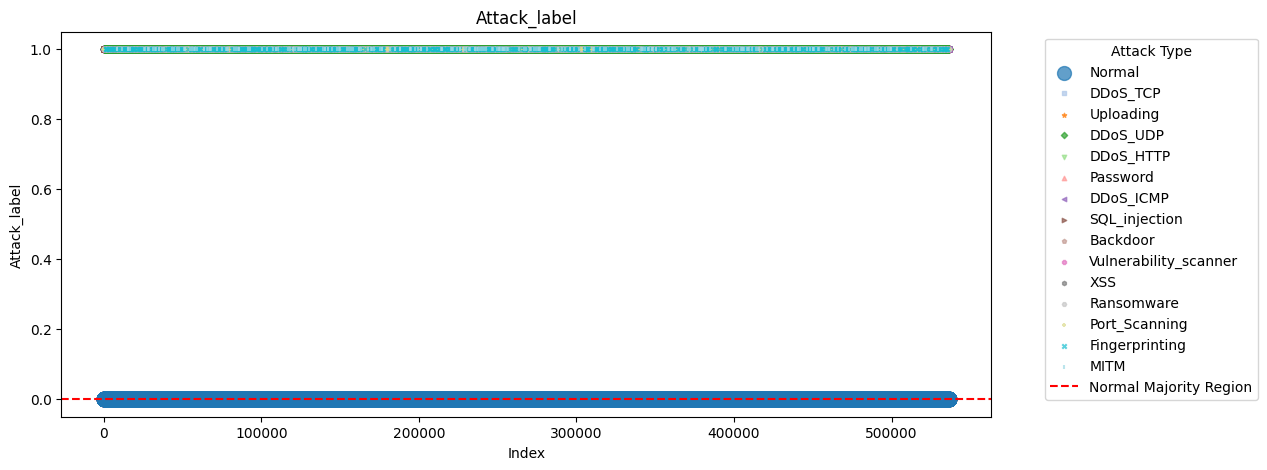

In [240]:
# gererate a plot for each numerical feature
for i in range(len(numerical_features)):
    plot_attack_types(df_original, numerical_features['Numerical Features'][i])

#### Categorical Features

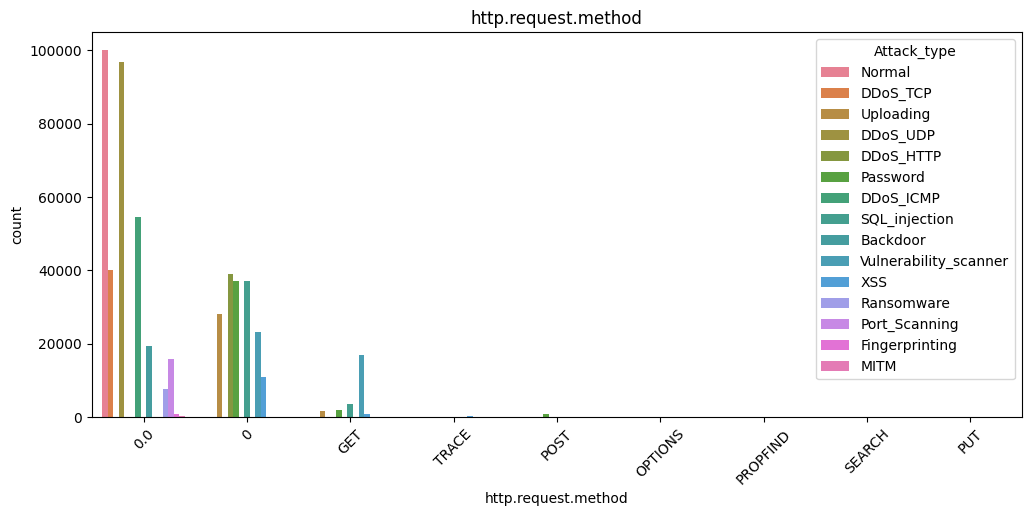

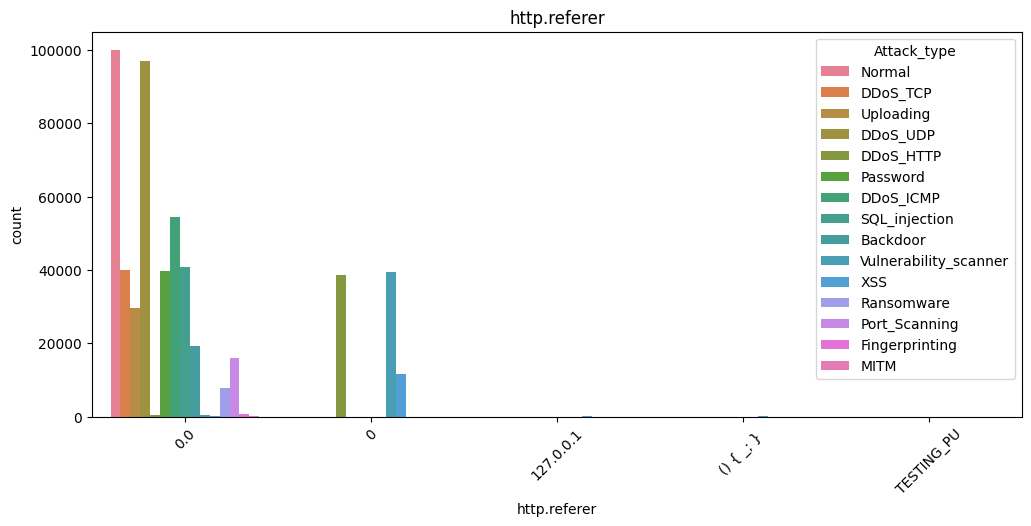

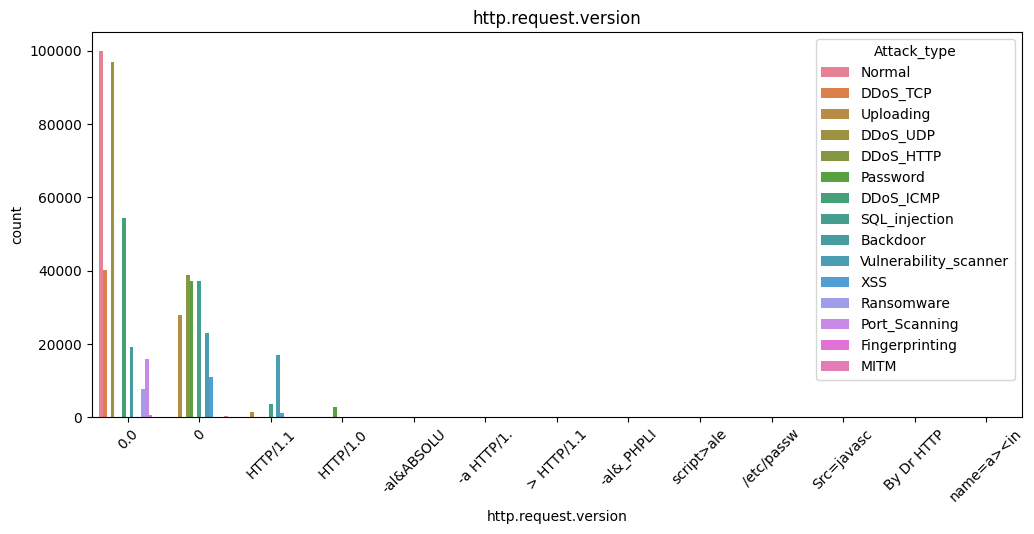

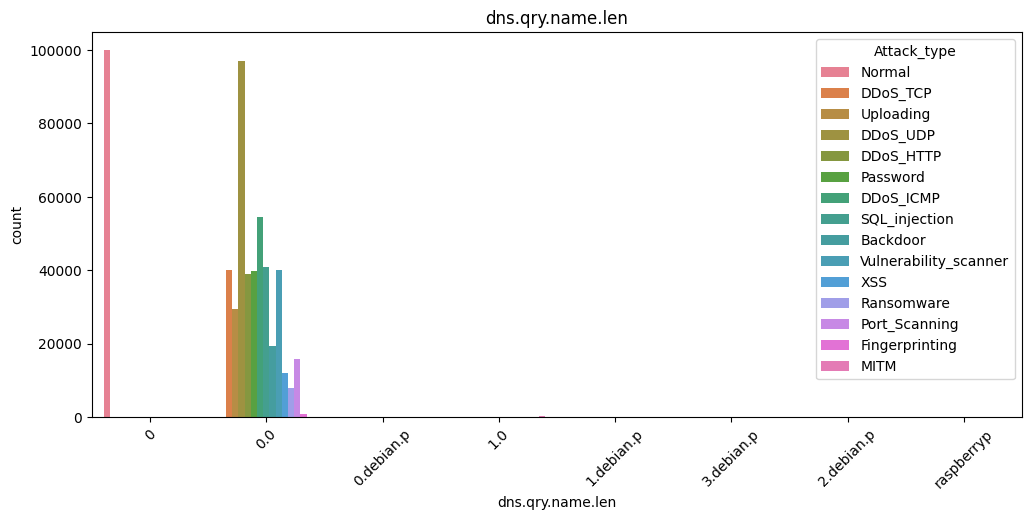

In [251]:

# Assuming categorical_features is a DataFrame containing column names
for i in range(len(categorical_features)):
    plt.figure(figsize=(12, 5))
    plt.title(categorical_features['Categorical Features 1'][i])
    
    # Truncate x-axis labels to the first 10 characters
    truncated_labels = df_original[categorical_features['Categorical Features 1'][i]].astype(str).apply(lambda x: x[:10])
    ax =sns.countplot(x=truncated_labels, hue='Attack_type', data=df_original)
    plt.xticks(rotation=45)
    plt.show()

### Clustering 

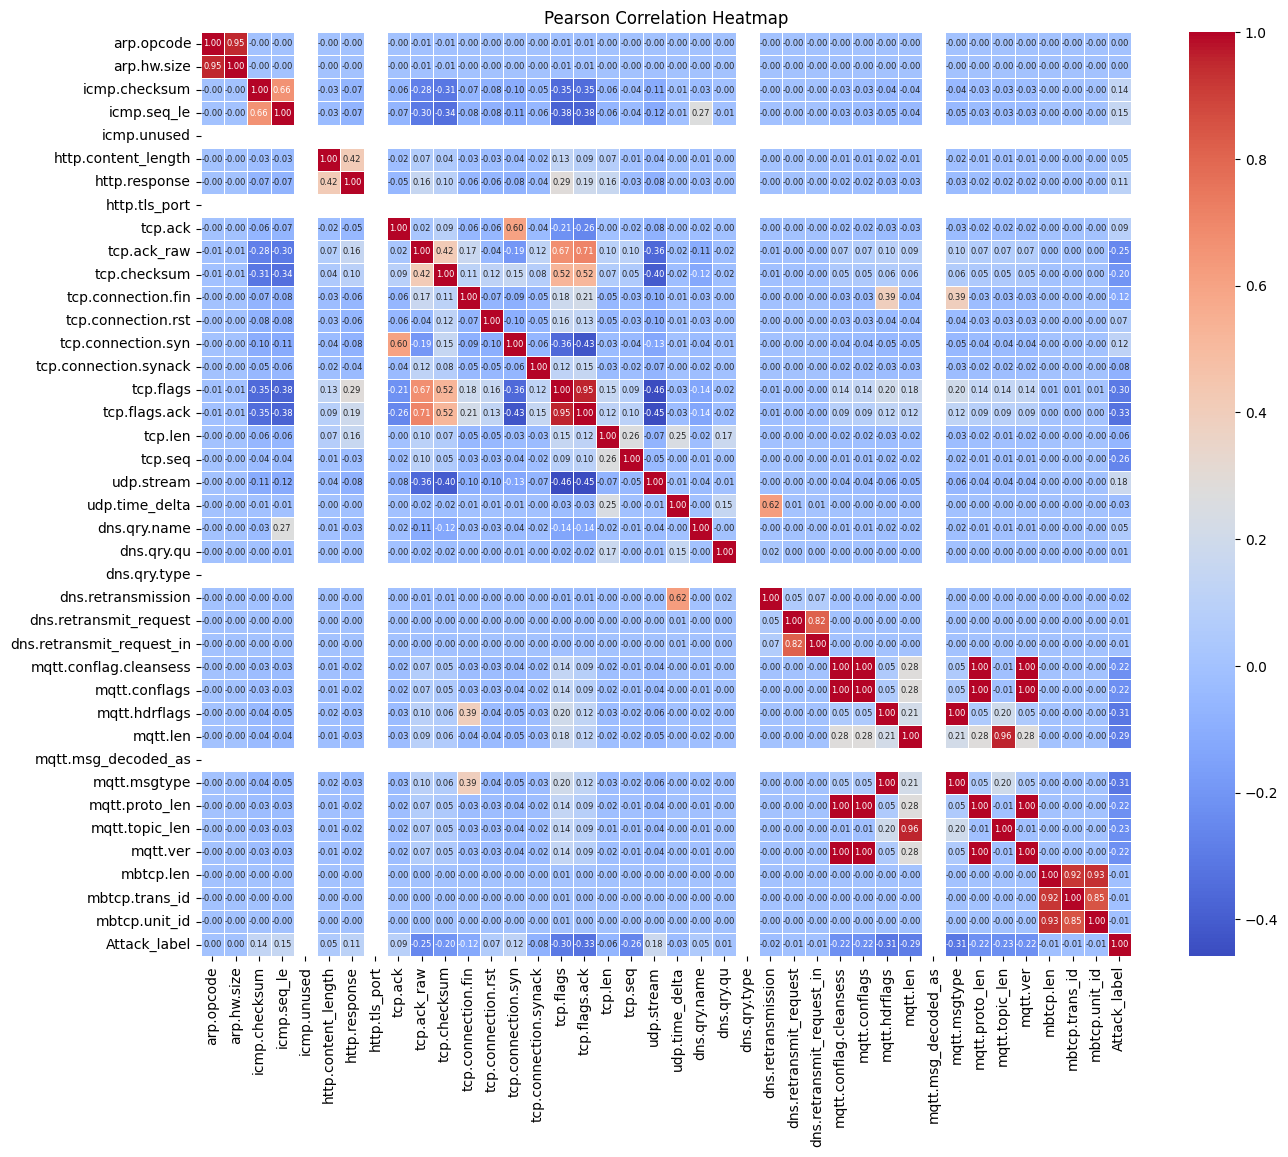

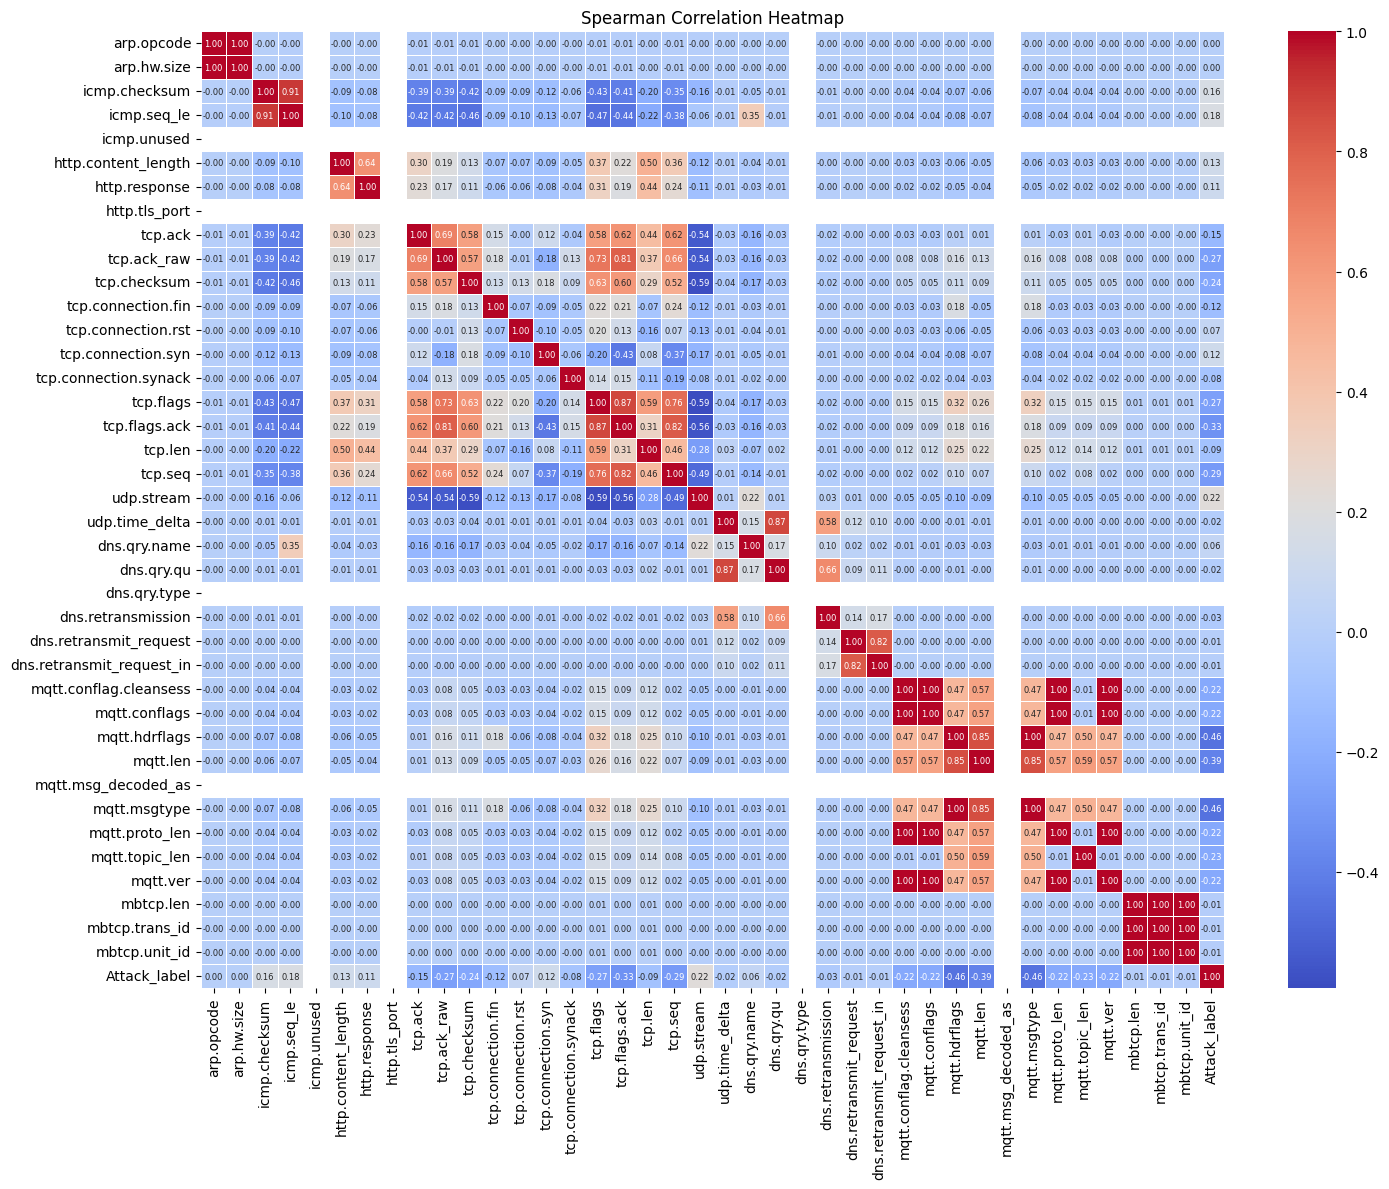

In [13]:
# Select numerical features for correlation analysis
numerical_features = df_original.select_dtypes(include=['float64', 'int64'])

# Calculate Pearson correlation matrix
pearson_corr = numerical_features.corr()

# Calculate Spearman correlation matrix
spearman_corr = numerical_features.corr(method='spearman')

# Plot Pearson correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 6})
plt.title('Pearson Correlation Heatmap')
plt.show()

# Plot Spearman correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 6})
plt.title('Spearman Correlation Heatmap')
plt.tight_layout()
plt.show()


In [30]:
from scipy.stats import f_oneway

# calculate the f-statistic and p-value for each numerical feature
f_statistic = []
p_value = []
for column in numerical_features:
    groups = [df[df['Attack_type'] == category][column] for category in df['Attack_type'].unique()]
    f, p = f_oneway(*groups)
    f_statistic.append(f)
    p_value.append(p)

# print the f-statistic and p-value 
f_statistic = pd.DataFrame(f_statistic, index=numerical_features.columns, columns=['F-Statistic'])
p_value = pd.DataFrame(p_value, index=numerical_features.columns, columns=['P-Value'])
f_stat_p_value = f_statistic.join(p_value)
# numerical cells with 3 decimal places
pd.options.display.float_format = '{:.3f}'.format
# if p-value is less than 0.05, make the line bold
def highlight_significant_p_value(val):
    if val < 0.05:
        return 'font-weight: bold'
    else:
        return 'font-weight: normal'
# show the f-statistic and p-value
f_stat_p_value.style.applymap(highlight_significant_p_value)

In [32]:
from scipy.stats import f_oneway, kruskal

# list of Attack_type categories
categories = df['Attack_type'].unique()

# list of numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# for all numerical feature calculate the f-statistic and p-value
f_statistic = []
p_value_anova = []
p_value_kruskal = []
for column in numerical_features:
    groups = [df[df['Attack_type'] == category][column] for category in df['Attack_type'].unique()]
    f, p_anova = f_oneway(*groups)
    h, p_kruskal = kruskal(*groups)
    f_statistic.append(f)
    p_value_anova.append(p_anova)
    p_value_kruskal.append(p_kruskal)

# print the f-statistic and p-value
f_statistic = pd.DataFrame(f_statistic, index=numerical_features, columns=['F-Statistic'])
p_value_anova = pd.DataFrame(p_value_anova, index=numerical_features, columns=['P-Value ANOVA'])
p_value_kruskal = pd.DataFrame(p_value_kruskal, index=numerical_features, columns=['P-Value Kruskal'])
f_stat_p_value = f_statistic.join(p_value_anova).join(p_value_kruskal)
# numerical cells with 3 decimal places
pd.options.display.float_format = '{:.3f}'.format
# if p-value is less than 0.05, make the line bold
def highlight_significant_p_value(val):
    if val < 0.05:
        return 'font-weight: bold'
    else:
        return 'font-weight: normal'
# show the f-statistic and p-value
f_stat_p_value.style.applymap(highlight_significant_p_value)



ValueError: All numbers are identical in kruskal

In [33]:
from scipy.stats import f_oneway, kruskal
import numpy as np

# list of Attack_type categories
categories = df['Attack_type'].unique()

# list of numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# for all numerical feature calculate the f-statistic and p-value
f_statistic = []
p_value_anova = []
p_value_kruskal = []
for column in numerical_features:
    groups = [df[df['Attack_type'] == category][column] for category in df['Attack_type'].unique()]
    # Check if any of the samples have identical values
    if any(len(np.unique(group)) == 1 for group in groups):
        f_statistic.append(np.nan)
        p_value_anova.append(np.nan)
        p_value_kruskal.append(np.nan)
    else:
        f, p_anova = f_oneway(*groups)
        h, p_kruskal = kruskal(*groups)
        f_statistic.append(f)
        p_value_anova.append(p_anova)
        p_value_kruskal.append(p_kruskal)

# print the f-statistic and p-value
f_statistic = pd.DataFrame(f_statistic, index=numerical_features, columns=['F-Statistic'])
p_value_anova = pd.DataFrame(p_value_anova, index=numerical_features, columns=['P-Value ANOVA'])
p_value_kruskal = pd.DataFrame(p_value_kruskal, index=numerical_features, columns=['P-Value Kruskal'])
f_stat_p_value = f_statistic.join(p_value_anova).join(p_value_kruskal)
# numerical cells with 3 decimal places
pd.options.display.float_format = '{:.3f}'.format
# if p-value is less than 0.05, make the line bold
def highlight_significant_p_value(val):
    if val < 0.05:
        return 'font-weight: bold'
    else:
        return 'font-weight: normal'
# show the f-statistic and p-value
f_stat_p_value.style.applymap(highlight_significant_p_value)

In [ ]:
Chi-Square Test of Independence:

This test is used to determine whether there is a significant association between two categorical variables. You can apply this test to understand if there is a relationship between a categorical feature and the attack types.
ANOVA (Analysis of Variance):

ANOVA can be used to assess the statistical significance of differences in means among multiple groups. If you have a numerical feature and want to know if there are significant differences in the means across different attack types, ANOVA could be appropriate.
T-Test:

If you are comparing the means of two groups (e.g., normal attacks vs. a specific type of attack), a t-test could be useful. There are different variants of the t-test depending on the assumptions and the nature of your data.
Correlation Analysis:

Calculate correlation coefficients (e.g., Pearson, Spearman) to measure the strength and direction of linear or monotonic relationships between numerical features and the target variable (attack types).
Feature Importance:

Use techniques such as information gain, mutual information, or feature importance from machine learning models to assess the importance of each feature in predicting attack types.
Logistic Regression:

Build a logistic regression model to predict the probability of a particular attack type based on the values of your features. This can provide insights into the impact of each feature on the likelihood of a specific attack type.
Clustering:

Apply clustering algorithms to group similar instances together. Analyzing the resulting clusters can reveal patterns and relationships between features and attack types.
Visual Exploration:

Create visualizations like box plots, violin plots, and swarm plots to visually inspect the distribution of feature values across different attack types.
Entropy and Information Gain:

For categorical features, calculate entropy and information gain to understand how well a feature discriminates between different attack types.
Outlier Detection:

Identify and analyze outliers in feature values to understand if extreme values are associated with specific attack types.

In [ ]:
import pandas as pd
from math import log2

def entropy(series):
    # Calculate the entropy of a categorical variable
    values, counts = series.value_counts().values, series.value_counts(normalize=True).values
    return -sum(p * log2(p) for p in counts)

def information_gain(data, feature, target):
    # Calculate information gain for a feature
    ent_target = entropy(data[target])
    ent_feature = sum(data.groupby(feature).apply(lambda x: len(x) / len(data) * entropy(x[target])))
    return ent_target - ent_feature

# Assuming 'Attack_type' is your target variable
target_variable = 'Attack_type'

# Calculate information gain for each feature
for feature in df.columns:
    if feature != target_variable:  # Skip the target variable itself
        ig = information_gain(df, feature, target_variable)
        print(f"Information Gain for{feature:<30}: {ig:.3f}")

Information Gain for arp.opcode: 4.440739989952647e-05
Information Gain for arp.hw.size: 3.887980584416084e-05
Information Gain for icmp.checksum: 0.48119711544295285
Information Gain for icmp.seq_le: 0.4918563019267488
Information Gain for icmp.unused: 0.0
Information Gain for http.content_length: 0.28678799388621545
Information Gain for http.request.method: 1.0109702329952195
Information Gain for http.referer: 0.6402862301004553
Information Gain for http.request.version: 1.0264071416589853
Information Gain for http.response: 0.11529111770654987
Information Gain for http.tls_port: 0.0
Information Gain for tcp.ack: 2.1455844103477
Information Gain for tcp.ack_raw: 2.717434064571445
Information Gain for tcp.checksum: 1.6681488165609317
Information Gain for tcp.connection.fin: 0.06881955067956458
Information Gain for tcp.connection.rst: 0.13642859026925658
Information Gain for tcp.connection.syn: 0.1707267887225239
Information Gain for tcp.connection.synack: 0.03393749146554148
Informati

In [ ]:

# from scipy.stats import ks_2samp

# # Teste de Kolmogorov-Smirnov
# def ks_test(data1, data2):
#     features = data1.columns

#     for feature in features:
#         stat, p_value = ks_2samp(data1[feature], data2[feature])
#         print(f"Resultado do teste de Kolmogorov-Smirnov para {feature}:\nEstatística: {stat}\nValor-p: {p_value}")

# ks_testv(df_original, df_smote)


In [ ]:
# Ouliers

def analyze_outliers(data1, data2):
    from sklearn.ensemble import IsolationForest

    clf = IsolationForest(contamination=0.1)
    # filter only numerical columns
    data1 = data1.select_dtypes(include=['float64', 'int64'])
    data2 = data2.select_dtypes(include=['float64', 'int64'])
    
    outliers_data1 = clf.fit_predict(data1)
    outliers_data2 = clf.fit_predict(data2)

    print("Number of outliers in the original data:  ", np.sum(outliers_data1 == -1))
    print("Number of outliers in the synthetic data:", np.sum(outliers_data2 == -1))

analyze_outliers(df_original, df_smote)

Number of outliers in the original data:   53650
Number of outliers in the synthetic data: 150000


In [ ]:
import pandas as pd
from math import log2

def entropy(series):
    values, counts = series.value_counts().values, series.value_counts(normalize=True).values
    return -sum(p * log2(p) for p in counts)

def information_gain(data, feature, target):
    ent_target = entropy(data[target])
    ent_feature = sum(data.groupby(feature).apply(lambda x: len(x) / len(data) * entropy(x[target])))
    return ent_target - ent_feature


target_variable = 'Attack_type'

# Get unique attack types
attack_types = df[target_variable].unique()
ig_df = pd.DataFrame(columns=['Attack_type', 'Feature', 'Information Gain'])

# Calculate information gain for each feature with respect to each attack type
for attack_type in attack_types:
    print(f"\nInformation Gain for {attack_type}:")
    
    # Subset the data for the specific attack type
    subset_data = df[df[target_variable] == attack_type]
    
    # Calculate information gain for each feature
    for feature in df.columns:
        if feature != target_variable:
            ig = information_gain(subset_data, feature, target_variable)
            print(f"{feature:<30}: {ig:.3f}")
            # stored in a DataFrame
            ig_df = pd.concat([ig_df, 
                               pd.DataFrame({'Attack_type': [attack_type], 'Feature': [feature], 'Information Gain': [ig]})], 
                               ignore_index=True)

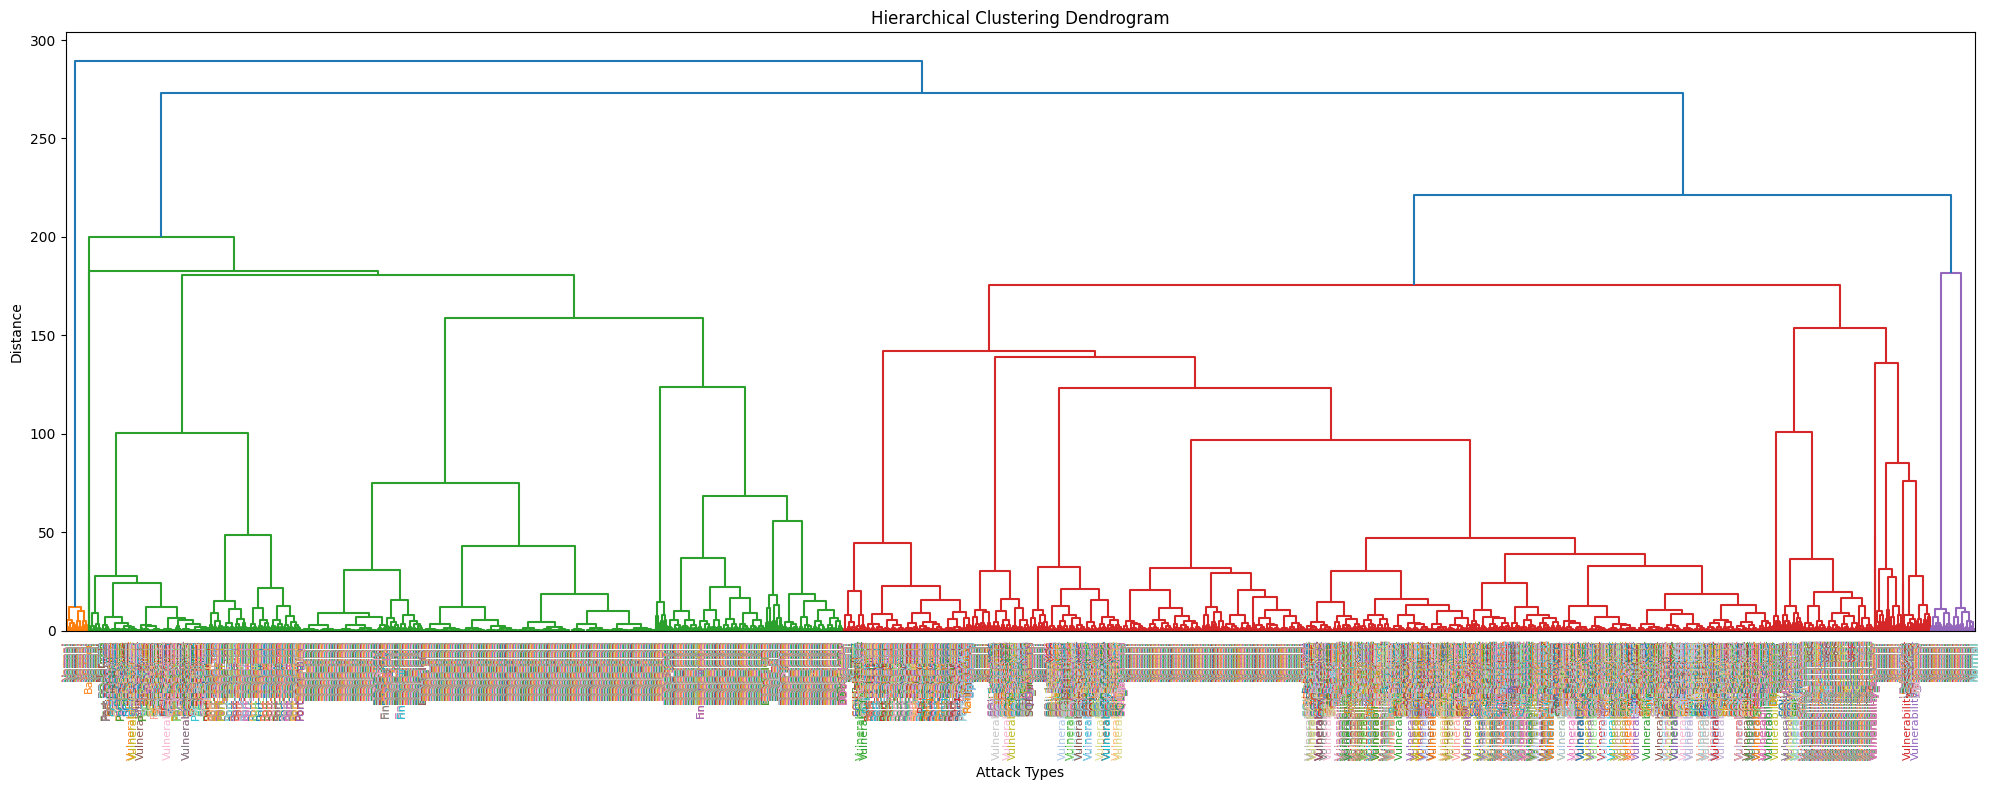

In [40]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


target_variable = 'Attack_type'

# Take a random sample (adjust the sample size as needed)
sample_size = 10000
data_sample = df.sample(sample_size, random_state=42)

# Select relevant features for clustering (assuming numerical features for simplicity)
numerical_features = data_sample.select_dtypes(include='number')

# Standardize the features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Hierarchical clustering
linkage_matrix = linkage(numerical_features_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(20, 8))
dendrogram(linkage_matrix, labels=data_sample[target_variable].values, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Attack Types')
plt.ylabel('Distance')

# Different text color for each attack type
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
num_clusters = len(xlbls)
for i in range(num_clusters):
    xlbls[i].set_color(plt.cm.tab20(i % 20))
    xlbls[i].set_fontsize(8)
    
plt.tight_layout()  
plt.show()

In [ ]:
# Ouliers

def analyze_outliers(data1, data2):
    from sklearn.ensemble import IsolationForest

    clf = IsolationForest(contamination=0.1)
    # filter only numerical columns
    data1 = data1.select_dtypes(include=['float64', 'int64'])
    data2 = data2.select_dtypes(include=['float64', 'int64'])
    
    outliers_data1 = clf.fit_predict(data1)
    outliers_data2 = clf.fit_predict(data2)

    print("Number of outliers in the original data:  ", np.sum(outliers_data1 == -1))
    print("Number of outliers in the synthetic data:", np.sum(outliers_data2 == -1))

analyze_outliers(df_original, df_smote)

Number of outliers in the original data:   53650
Number of outliers in the synthetic data: 150000


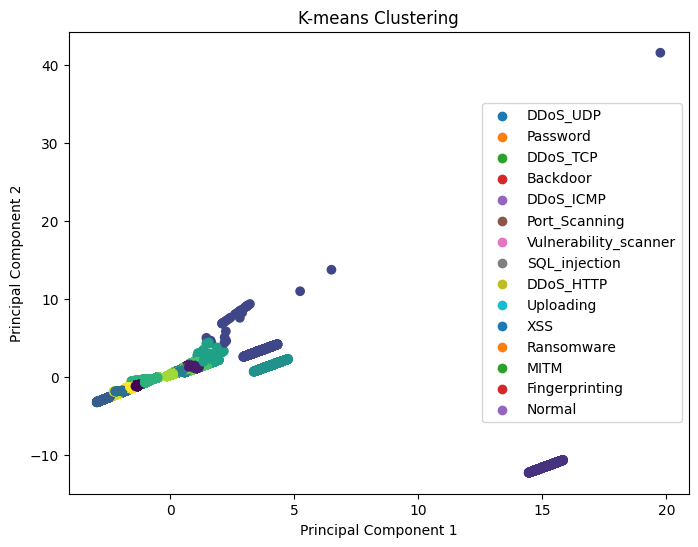

In [8]:
# dimensionality reduction and clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# drop the target variable
numerical_features = numerical_features.drop('Attack_label', axis=1)

# Color of points of clusters are Attack_type labels
attack_types = df['Attack_type'].unique()

# Standardize the features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Reduce the dimensionality of the data
pca = PCA(n_components=2)
numerical_features_2d = pca.fit_transform(numerical_features_scaled)

# K-means clustering
kmeans = KMeans(n_clusters=len(attack_types), random_state=42)
clusters = kmeans.fit_predict(numerical_features_2d)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(numerical_features_2d[:, 0], numerical_features_2d[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
# legend
for attack_type in attack_types:
    plt.scatter([], [], label=attack_type)
plt.legend()
plt.show()


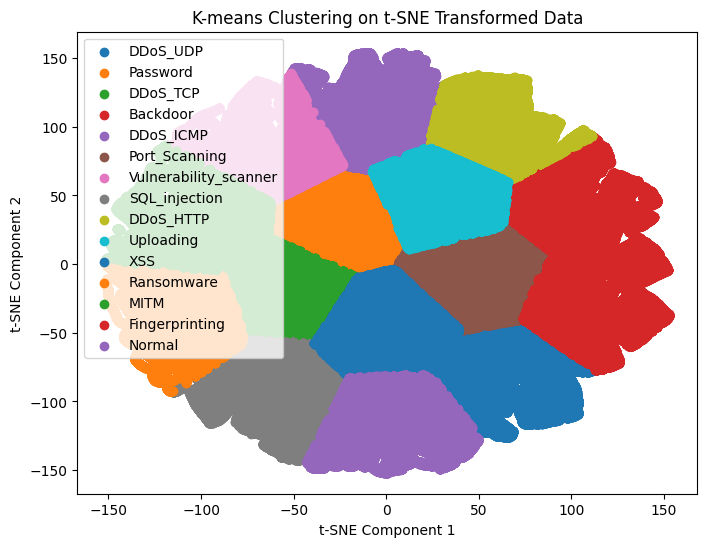

In [9]:
from sklearn.manifold import TSNE

# Reduce the dimensionality of the data using t-SNE
tsne = TSNE(n_components=2, random_state=42)
numerical_features_2d_tsne = tsne.fit_transform(numerical_features_scaled)

# K-means clustering on t-SNE transformed data
kmeans_tsne = KMeans(n_clusters=len(attack_types), random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(numerical_features_2d_tsne)

# Plot the clusters
plt.figure(figsize=(8, 6))
for i, attack_type in enumerate(attack_types):
    plt.scatter(numerical_features_2d_tsne[clusters_tsne == i, 0], 
                numerical_features_2d_tsne[clusters_tsne == i, 1], 
                label=attack_type)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-means Clustering on t-SNE Transformed Data')
plt.legend()
plt.show()

In [12]:
from sklearn.cluster import DBSCAN, MeanShift, SpectralClustering
# import hdbscan

from sklearn.preprocessing import StandardScaler

# select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)


# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(numerical_features_scaled)

# # Apply HDBSCAN
# hdbscan_model = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=10)
# clusters_hdbscan = hdbscan_model.fit_predict(numerical_features_scaled)

# # Apply Mean Shift
# mean_shift = MeanShift()
# clusters_mean_shift = mean_shift.fit_predict(numerical_features_scaled)

# # Apply Spectral Clustering
# spectral = SpectralClustering(n_clusters=len(attack_types), random_state=42)
# clusters_spectral = spectral.fit_predict(numerical_features_scaled)

# Plot the clusters for each algorithm
# algorithms = ['DBSCAN', 'HDBSCAN', 'Mean Shift', 'Spectral Clustering']
algorithms = ['DBSCAN']
cluster_results = [clusters_dbscan, clusters_hdbscan, clusters_mean_shift, clusters_spectral]

for algorithm, cluster_result in zip(algorithms, cluster_results):
    plt.figure(figsize=(8, 6))
    for i, attack_type in enumerate(attack_types):
        plt.scatter(numerical_features_2d[cluster_result == i, 0], numerical_features_2d[cluster_result == i, 1], label=attack_type)

    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'{algorithm} Clustering')
    plt.legend()
    plt.show()


: 

In [8]:
from sklearn.preprocessing import StandardScaler

# select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

In [ ]:
from sklearn.cluster import MeanShift

# Apply Mean Shift
mean_shift = MeanShift()
# Randomly select 10000 data points from numerical_features_scaled
numerical_features_scaled_sample = numerical_features_scaled[np.random.choice(numerical_features_scaled.shape[0], 
                                                                              1000, 
                                                                              replace=False)]

clusters_mean_shift = mean_shift.fit_predict(numerical_features_scaled_sample)

attack_types = df['Attack_type'].unique()

plt.figure(figsize=(8, 6))
for i, attack_type in enumerate(attack_types):
    plt.scatter(numerical_features_2d[clusters_mean_shift == i, 0], 
                numerical_features_2d[clusters_mean_shift == i, 1], 
                label=attack_type)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f'{algorithm} Clustering')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)

# Randomly select 10000 data points from numerical_features_scaled
numerical_features_scaled_sample = numerical_features_scaled[np.random.choice(numerical_features_scaled.shape[0], 
                                                                              10000, 
                                                                              replace=False)]

clusters_dbscan = dbscan.fit_predict(numerical_features_scaled_sample)

plt.figure(figsize=(8, 6))
for i, attack_type in enumerate(attack_types):
    plt.scatter(numerical_features_2d[clusters_dbscan == i, 0], 
                numerical_features_2d[clusters_dbscan == i, 1], 
                label=attack_type)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f'{algorithm} Clustering')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=len(attack_types), random_state=42)
clusters_spectral = spectral.fit_predict(numerical_features_scaled)

plt.figure(figsize=(8, 6))
for i, attack_type in enumerate(attack_types):
    plt.scatter(numerical_features_2d[clusters_spectral == i, 0], 
                numerical_features_2d[clusters_spectral == i, 1], 
                label=attack_type)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f'{algorithm} Clustering')
plt.legend()
plt.show()